In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt

plt.style.use('dark_background')

import seaborn as sns
from scipy import stats as st
import numpy as np
from itertools import cycle, islice

In [3]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод по первой части
- По предварительной информации мы выявили что: типы данных некоторых столбцов некорректны, нужно привести столбцы к нижнему регистру.

In [6]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

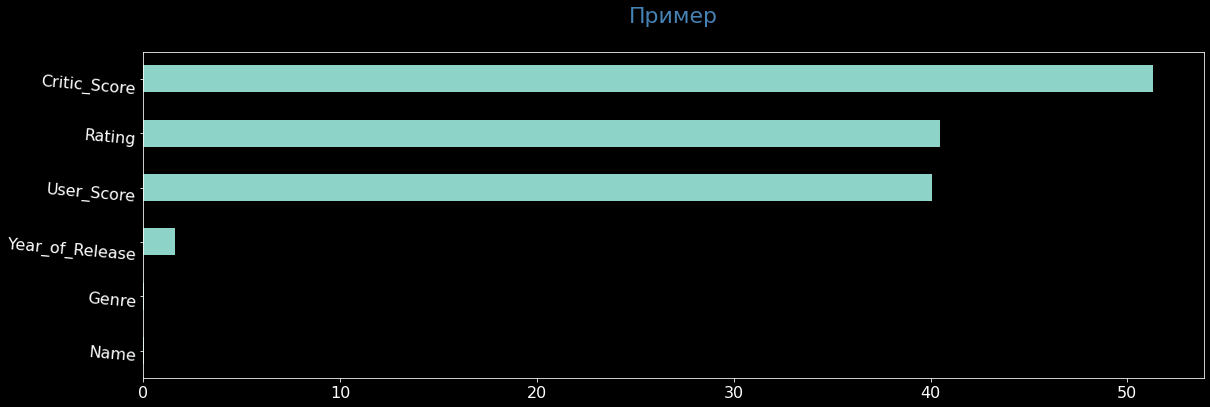

In [7]:
pass_value_barh(df)

In [8]:
df.columns = df.columns.str.lower() 

In [9]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1.5       2
2.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [12]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [13]:
len_before=df.shape[0]

In [14]:
df.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
df = df.dropna(subset = ['genre','year_of_release']).reset_index(drop=True) 

In [16]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [17]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [19]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
len(df) / len_before # нам удалось сохранить 98.4 процента всех данных

0.9837870176488184

In [21]:
df['name'].duplicated().sum() # единственный столбец в котором не должно быть дубликатов

5018

In [22]:
df['name'].value_counts()

Need for Speed: Most Wanted    12
FIFA 14                         9
LEGO Marvel Super Heroes        9
Ratatouille                     9
Angry Birds Star Wars           8
                               ..
RPG Tsukuru DS                  1
Transport Fever                 1
Sega Rally Championship 2       1
Great Battle Full Blast         1
Hot Shots Golf: Open Tee 2      1
Name: name, Length: 11426, dtype: int64

In [23]:
df.query('name == "Need for Speed: Most Wanted"') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
252,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
519,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1976,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2025,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3531,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6177,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6310,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [24]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [25]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df[df[['name', 'platform', 'year_of_release']].duplicated()]
df.query('name == "madden nfl 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,madden nfl 13,x360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
600,madden nfl 13,ps3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3933,madden nfl 13,wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5800,madden nfl 13,psv,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
6956,madden nfl 13,wiiu,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
15969,madden nfl 13,ps3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [26]:
df = df.query("index not in [15969]")
df.query('name == "madden nfl 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,madden nfl 13,x360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
600,madden nfl 13,ps3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3933,madden nfl 13,wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5800,madden nfl 13,psv,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
6956,madden nfl 13,wiiu,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


In [27]:
df.reset_index(drop=True, inplace = True)

In [28]:
df['full_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [29]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16439,lma manager 2007,x360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16440,haitaka no psychedelica,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16441,spirits & spells,gba,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Вывод:**
- 1. Названия столбцов приведены к нижнему регитру
- 2. Пропуски в столбце Genre и Name совпадают строки всего две, но информацию в них очень тяжело восстановить было принято решение удалить пропуски 
- 3. Пропуски в столбце years_of_release была идея посмотреть можно ли отсутствующее значение вытащить с других платформ, но как показала таблица с игрой NFS для каждой платформы может быть своя дата релиза, пропусков так же не так много, принято решение удалить пропущенные значения.
- 4. С пропусками в остальных столбцах я решил пока ничего не делать.
- 5. После удаления строк с пропущенными значениями в столбцах year_of_release и genre осталось 98,4% данных что в свою очередь является хорошим результатом.
- 6. Типы данных в столбцах user_score и year_of_release были заменены на float и int соответственно.
- 7. Создан столбец full_sales в которых входит сумма продаж игры по всем регионам
- 8. Абривиатура tbd означает что данных от пользователя недостаточно для того что бы присвоить рейтинг.

- Для формирования рейтинга не требуется огромное кол-во фидбеков от пользователей или же рейтинговых агенств и пропуски в значениях в нашем случае были утеряны при сборе или формировании базы данных, так же хочется отметить что оценка одной и той же игры под разные платформы можете отлчаться, это связано с вероятностью плохой оптимизации.

- Entertainment Software Rating Board — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Если честно заполнение пропусков в категориальных данных и особенно в этом примере (то как я вижу это у себя в голове) это ну через чур:D 
больше похоже на то что т.к. это сборный проект то просто нужно было залепить куда то метод применение метода fillna() 
а это уже напоминает какое то заскриптованное обучение. 
Если я считаю неправильно пожалуйста объясните мне как в данном случае можно заполнить пропуски в rating для того что бы выборка была более репрезантативной.

In [30]:
df['rating'] = df['rating'].fillna('unknown_category')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  full_sales       16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Проведем исследовательский анализ данных

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

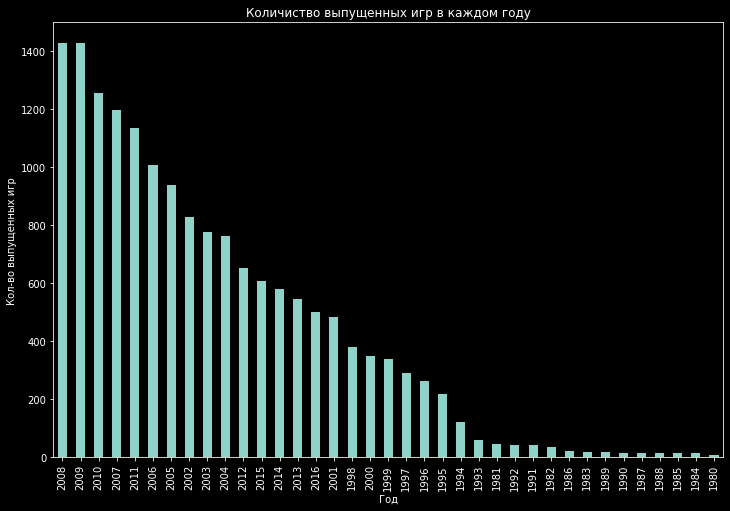

In [33]:
(
    df['year_of_release']
    .value_counts()
    .plot(kind='bar', figsize = (12,8)
          , title = 'Количиство выпущенных игр в каждом году'
          ,ylabel ='Кол-во выпущенных игр'
          ,xlabel = "Год")
);
df['year_of_release'].value_counts()

In [34]:
platform_df = (
    df
    .pivot_table(columns = 'year_of_release', values = 'full_sales', index = 'platform',aggfunc = 'count')
)

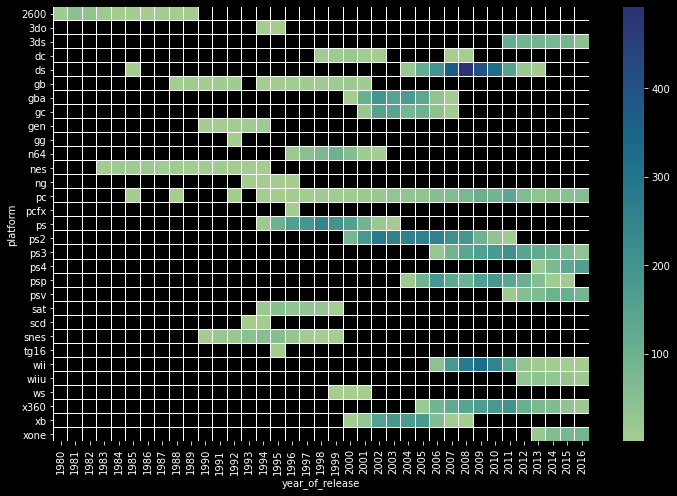

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(platform_df,cmap="crest",linewidths=0.01);

In [36]:
platfrom_sum = platform_df.groupby('platform').sum()

In [37]:
platfrom_sum = platfrom_sum.sum(axis=1).sort_values(ascending=False)

In [38]:
#platform_year = 
platform_df['year_sum'] = platform_df.count(axis =1)

In [39]:
year_count = platform_df['year_sum']

In [40]:
platfrom_sum = platfrom_sum.to_frame()
platfrom_sum.reset_index(inplace=True)
year_count = year_count.to_frame()
year_count.reset_index(inplace=True)

In [41]:
platform_info = platfrom_sum.merge(year_count,how='left')
platform_2016 = platform_df[2016]
platform_2016 = platform_2016.to_frame()
platform_2016.reset_index(inplace=True)
platform_info = platform_info.merge(platform_2016)
platform_info = platform_info.fillna(0)

In [42]:
platform_info.columns = ['platform', 'total_sales', 'years_actual', 'sales_2016']

In [43]:
platform_info.loc[1,'years_actual'] = 10

In [44]:
platform_info.drop(labels = [7], inplace = True)

In [45]:
platform_info.reset_index(drop=True, inplace=True)

In [46]:
platform_info = platform_info.query('total_sales > 100')

In [47]:
platform_info = platform_info.query('sales_2016 == 0')
platform_info.reset_index(inplace=True)

In [48]:
platform_info['years_actual'].mean()

9.181818181818182

In [49]:
platform_release = len(df.groupby('platform')['year_of_release'].min().value_counts())
total_years = df['year_of_release'].max() - df['year_of_release'].min()
(platform_release / total_years).round(2)

0.56

**Короткий вывод**
- Переодичность появления новых приставок за 36 лет приставки были выпущены в 20 годах то есть приблизительно каждые два года выходят новые приставки
- Средняя актуальность хорошей приставки равна +-9 годам


In [50]:
df_2015 = df.query('year_of_release >= 2015')
df_2015.reset_index(inplace=True, drop=True)
df_2015

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown_category,14.63
1,fifa 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
2,star wars battlefront (2015),ps4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown_category,7.98
3,fifa 17,ps4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
4,call of duty: black ops 3,xone,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown_category,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
1103,the longest 5 minutes,psv,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown_category,0.01
1104,strawberry nauts,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown_category,0.01
1105,samurai warriors: sanada maru,ps3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown_category,0.01
1106,haitaka no psychedelica,psv,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown_category,0.01


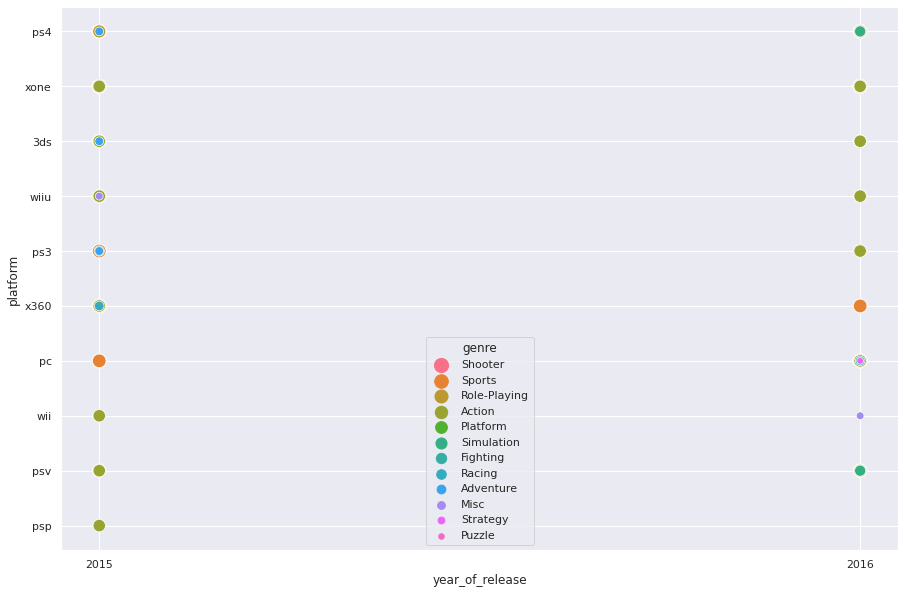

In [51]:
sns.set(rc={'figure.figsize':(15,10)})
(
    sns.scatterplot(data=df_2015
                    ,x="year_of_release"
                    ,y="platform"
                    ,hue="genre"
                    ,size="genre"
                    ,sizes=(30, 200))
    .set(xticks=range(2015, 2017))
);

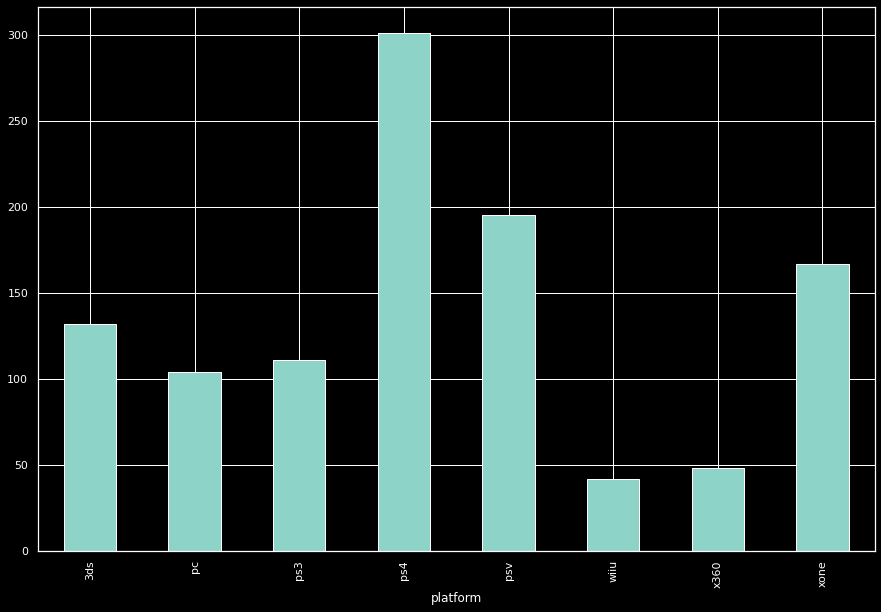

In [52]:
df_2015['platform_count'] = df_2015.groupby('platform')['platform'].transform('count')
df_2015=df_2015.query('platform_count > 10').reset_index(drop=True)
df_2015=df_2015.drop(['platform_count'], axis=1)
plt.style.use('dark_background')
(
    df_2015
    .groupby('platform')['year_of_release']
    .count()
    .plot(kind='bar')
);


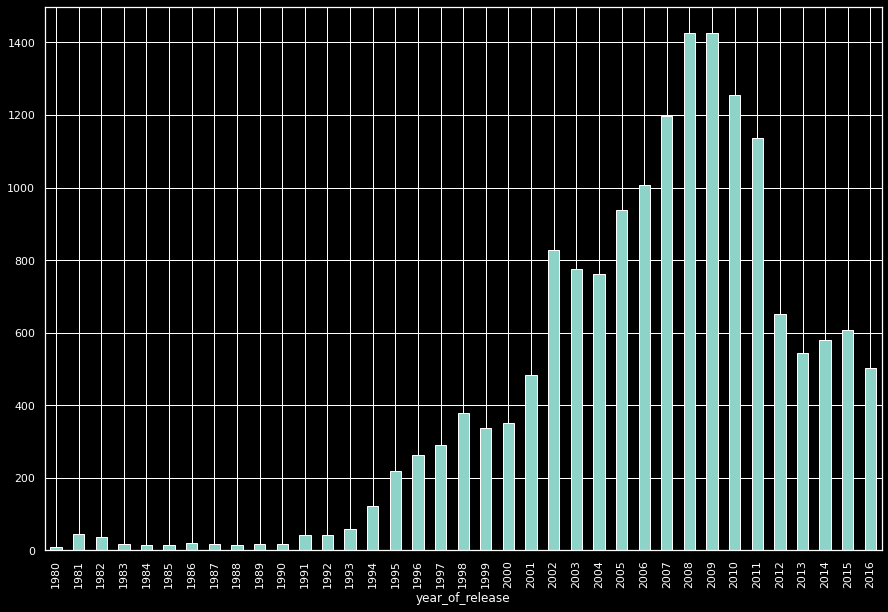

In [53]:
(
    df
    .groupby('year_of_release')['platform']
    .count()
    .plot(kind='bar')
);

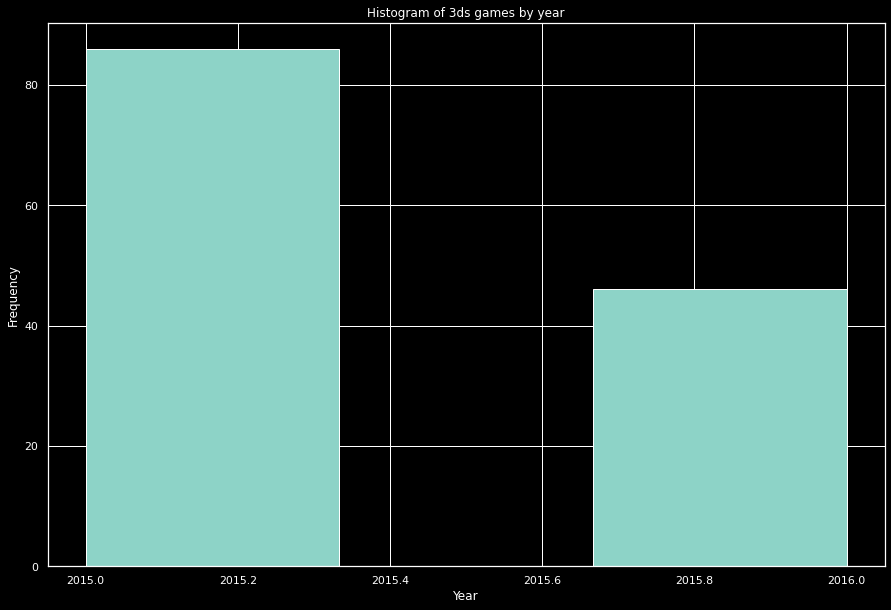

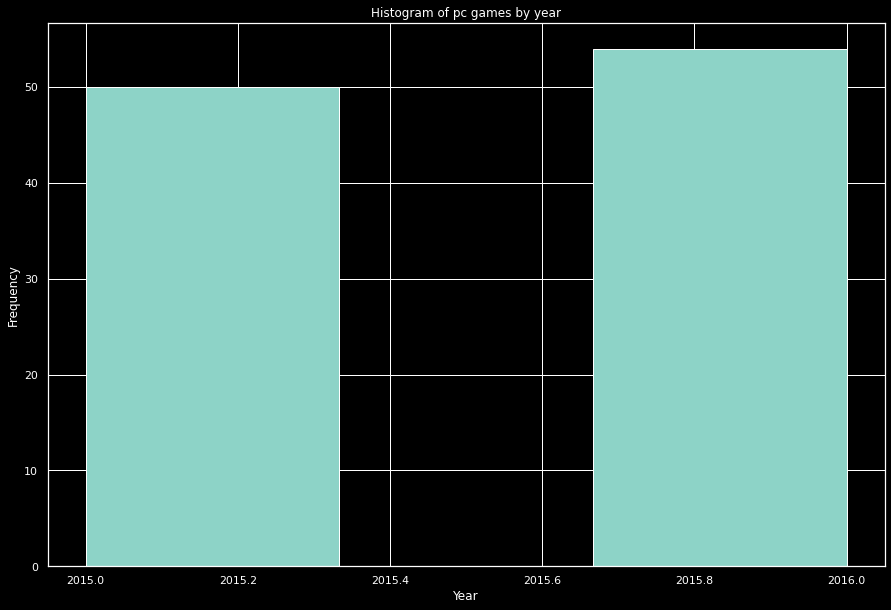

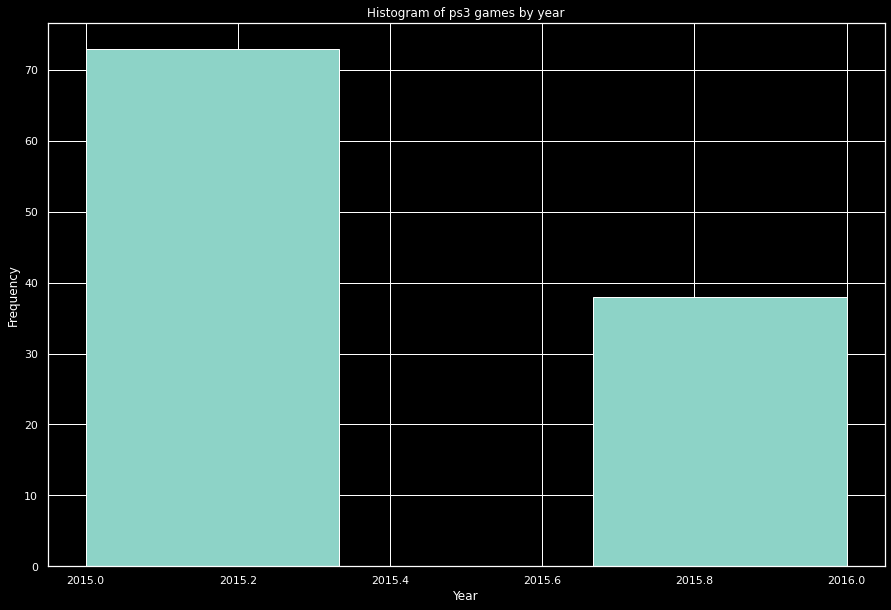

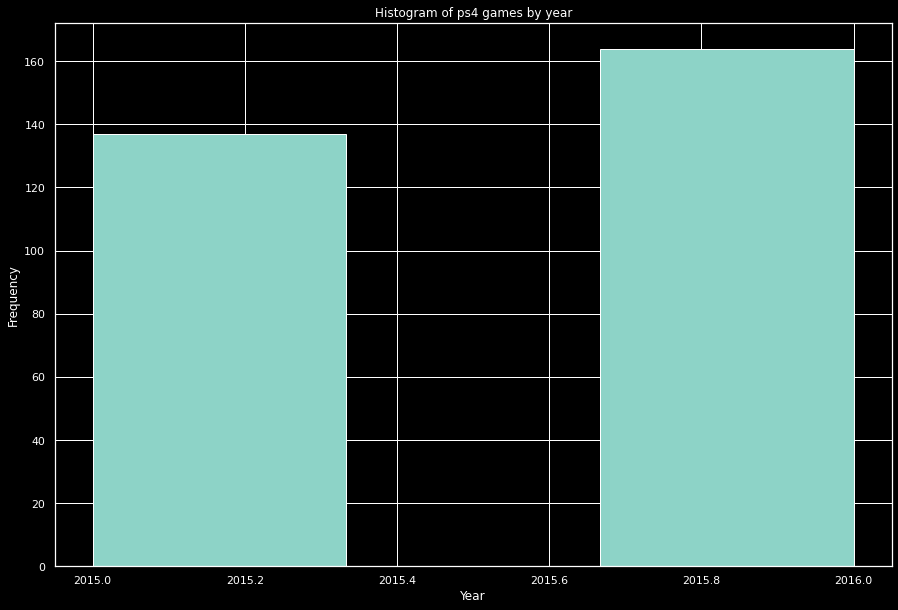

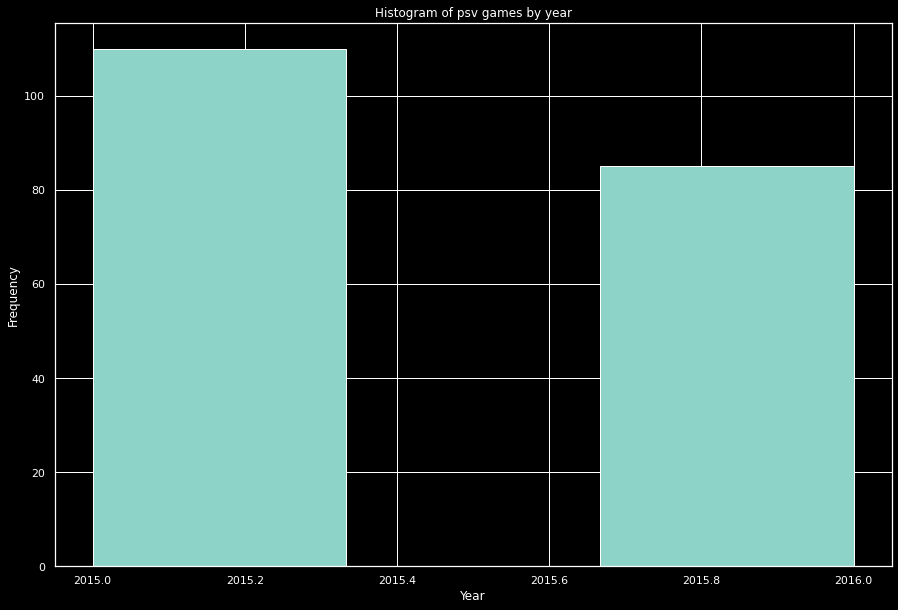

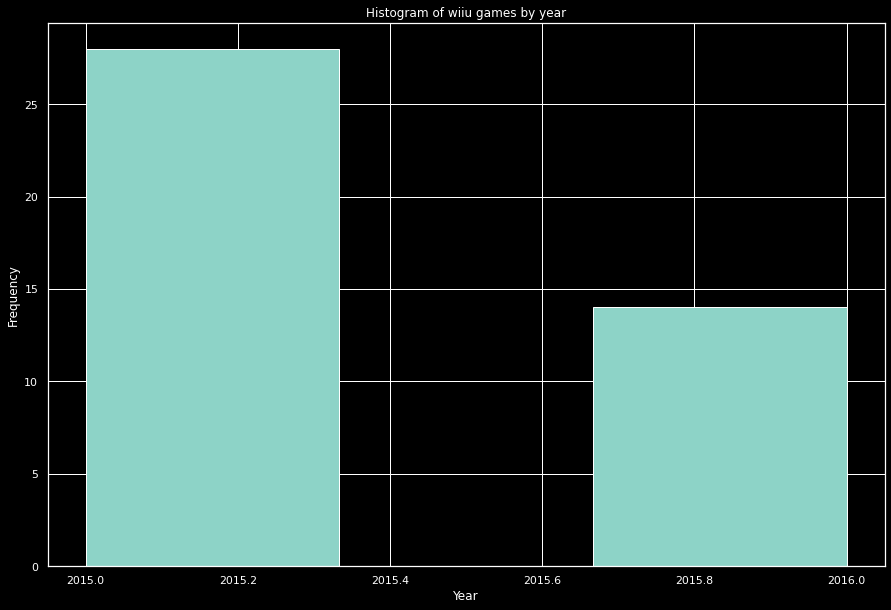

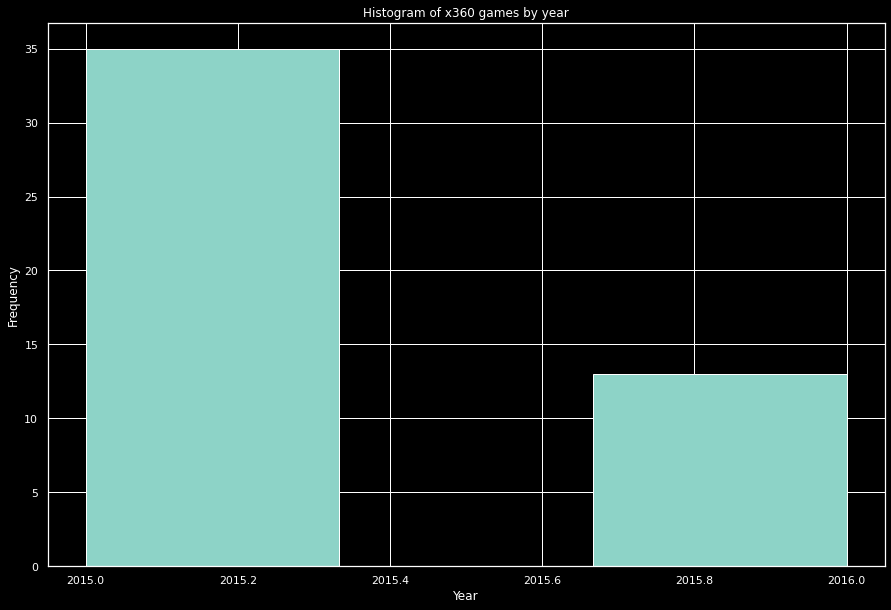

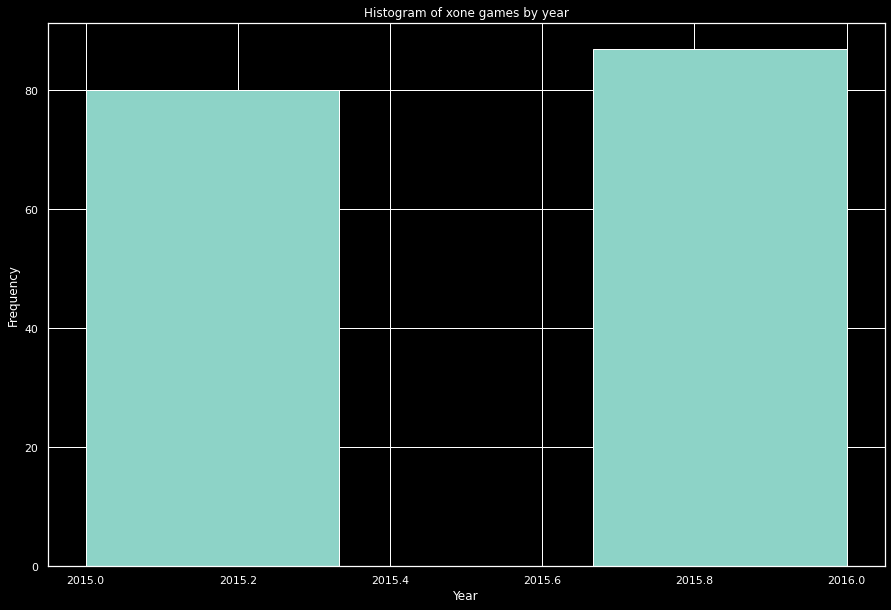

In [54]:
df_platform_year = df_2015[['platform', 'year_of_release']]
for platform, data in df_platform_year.groupby('platform'):
    plt.hist(data['year_of_release'], bins=3)
    plt.title(f'Histogram of {platform} games by year')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

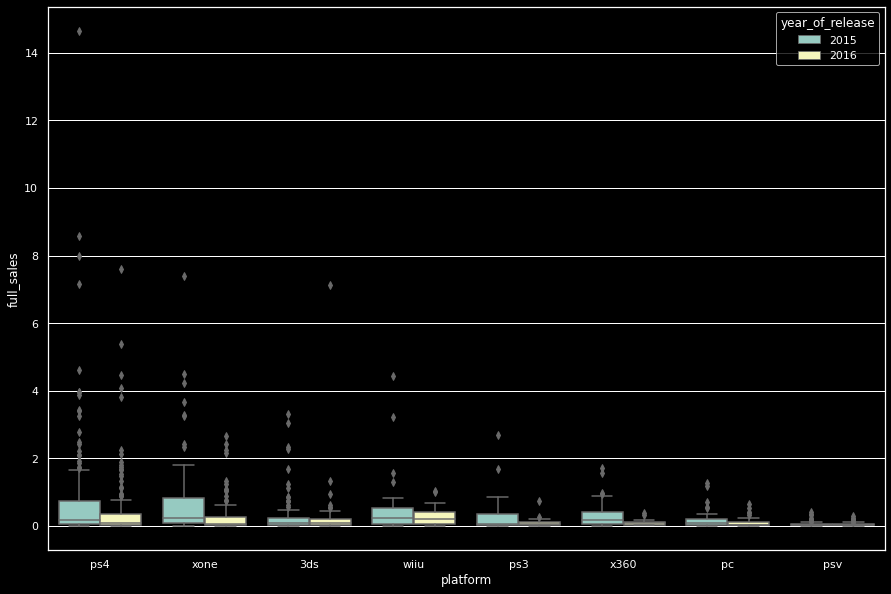

In [56]:
sns.boxplot(data = df_2015, x = 'platform', y='full_sales',hue= 'year_of_release' );

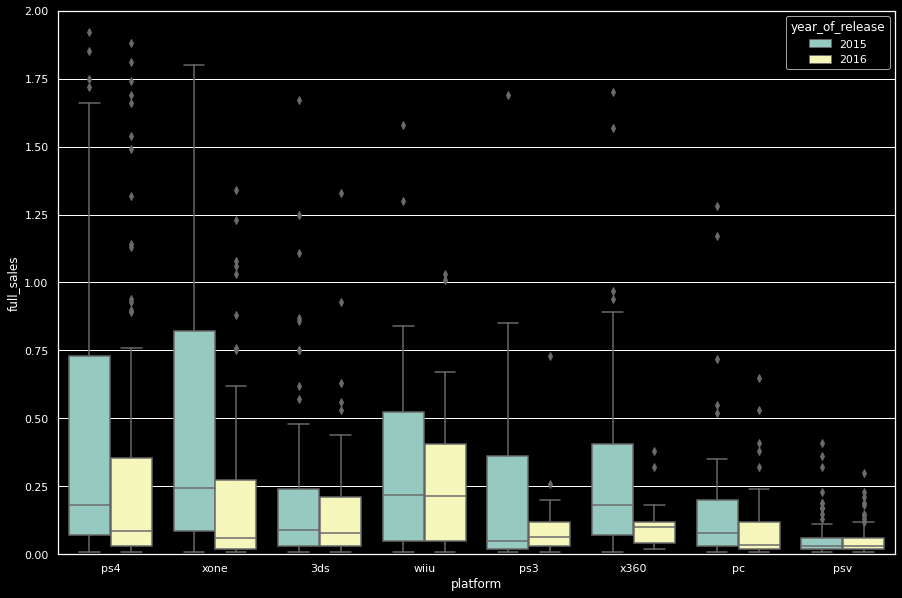

In [57]:
sns.boxplot(data = df_2015, x = 'platform', y='full_sales',hue= 'year_of_release' );
plt.ylim([0,2]);

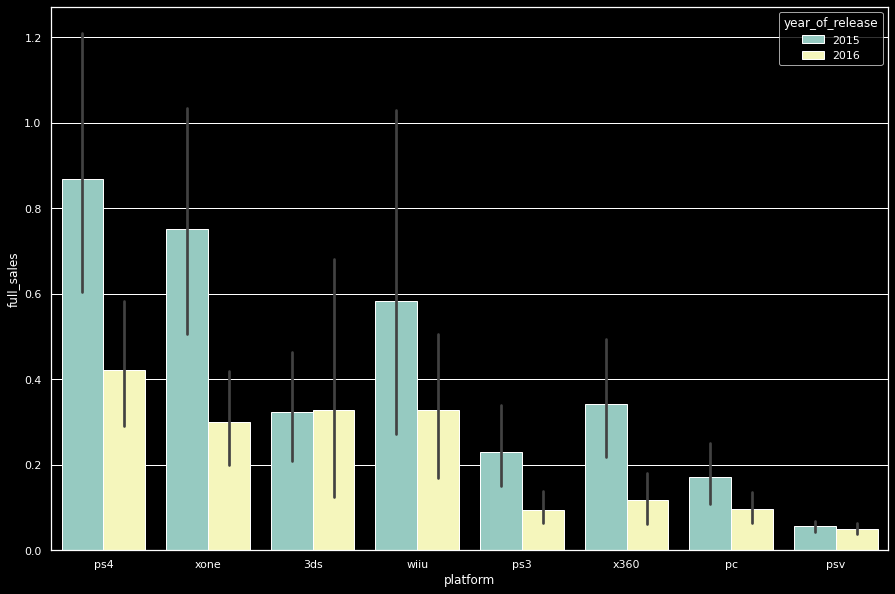

In [58]:
sns.barplot(data = df_2015, x = 'platform', y='full_sales',hue= 'year_of_release' );

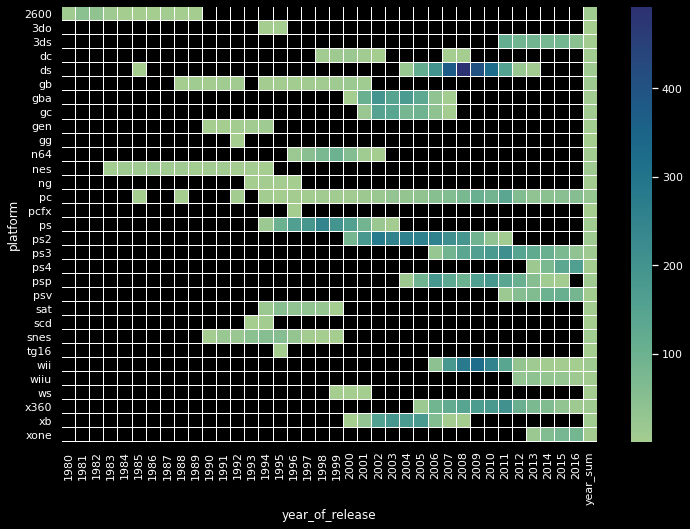

In [59]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(platform_df,cmap="crest",linewidths=0.01);

**BOXPLOT + Детальный анализ платформ**
- На графике Boxplot мы видим что основной уровень продаж за последние годы в основном находится в диапазоне 2 миллионов копий


----
**Присвоим платформам уровень доверия**


Высокий потенциал на рынке - ✅


Все сложно - ❗


Низкий потенциал - ❌


----

PS4 ✅ - Является флагменской приставкой компании SONY за последние годы собирает большую долю рынка, так же релиз приставки состоялся в 2013 году что значит что она еще долго будет актуальна


XBOX One ✅ - Главный конкурент PS4 Microsoft и Sony уверенно держутся за рынок и имеют огромную базу фанатов. Релиз приставки состоялся так же в 2013 году.


3DS/WiiU ✅ - Nintendo компания которая не является прямым конкурентом для microsoft т.к. ориентированы на рынок портотивных приставок. Продукты компании 3DS и WiiU на рынке с 2011 и 2012 года и все это время в полном объеме удовлетворяют желания игроков.


PS3/XBOX360 ❌ - Культовые продукты компаний Sony и Microsoft долгое время радовали своих фанатов, но в прогнозе на ближайшие годы им точно придется уступить свои места своим младшим высокотехнологичным сестренкам. На рынке они с 2005-2006 года и уже отстают от требований которые диктуют GameDev компании.


PC ✅ - Нестареющая классика. Пк не является конкурентом для обычных или портативных приставок. На протяжении нескольких десятилетий показывает стабильно хорошие результаты по уровню продаж.


PS Vita ❗ - Выходила как аналоговый флагман своей старшей сестры - легендарной PSP, но тем же успехом ввиду некоторых обстоятельств не воспользовалась. На рынке с 2011. Является конкурентом для более популярных 3DS/WiiU. Sony возлогали большие надежды на данный продукт т.к. она выпускалась на замену старушке PSP которая в свое время была мечтой каждого второго, но дела с данной моделью пошли не так гладко как они ожидали. Как сказал один игровой критик "Очень жаль что PS Vita умерла не от почтенной старости".

- На гистограммах видно распределение кол-ва игр которое выходит на самые популярные приставки каждый год.


- Для себя мы можем отметить что при выходе игровой приставки первые несколько лет выпускаемые на нее игры растут из года в год до обновления модели. Не смотря на то что приставок в нашем топе оказалось аж 7 штук, компаний выпускающих эти приставки всего три wii(nintendo),xbox(microsoft) и Play Station (sony) можно сделать вывод что эти три компании на данный момент стоят особняком в игровой индустрии. За исключением конечно же PC.


- По графикам так же ожидается на 2017 высокий спрос на такие приставки как XOne,PSV- Vita портативная приставка от компании Сони и ее старшая сестричка PS4, так же неплохую актуальность будет иметь 3DS-продукт компании nintendo, но исходя из наших исследований уход в закат для данной приставки не за горами. Спрос на игры для pc давольно стабилен, а вот поддержку от разработчиков таких приставок как PS2/3,wii,x360 в скором времени придется остановить. 


- Несмотря на то что игровые платформы окончательно пережили свой пик в 2011 году, последние годы спрос на игры равнораспределен в районе 500-600 игр к этому показателю как я думаю мы и будем стремиться в 2017. 


- Так же хочется отметить что при том что кол-во игр выпускаемых разработчиками значительно снизилось, совсем не означает того что игры стали менее актуальны и самих игроков стало меньше. Вполне вероятно что рынок GameDev стал не очень конкурентным или переориентировался например если раньше разработчик выпускал 3 игры то сейчас он выпускает вместо этого одну вводит внутриигровые покупки и обнавляет ее переодически.

In [60]:
df_2015['platform'].value_counts()

ps4     301
psv     195
xone    167
3ds     132
ps3     111
pc      104
x360     48
wiiu     42
Name: platform, dtype: int64

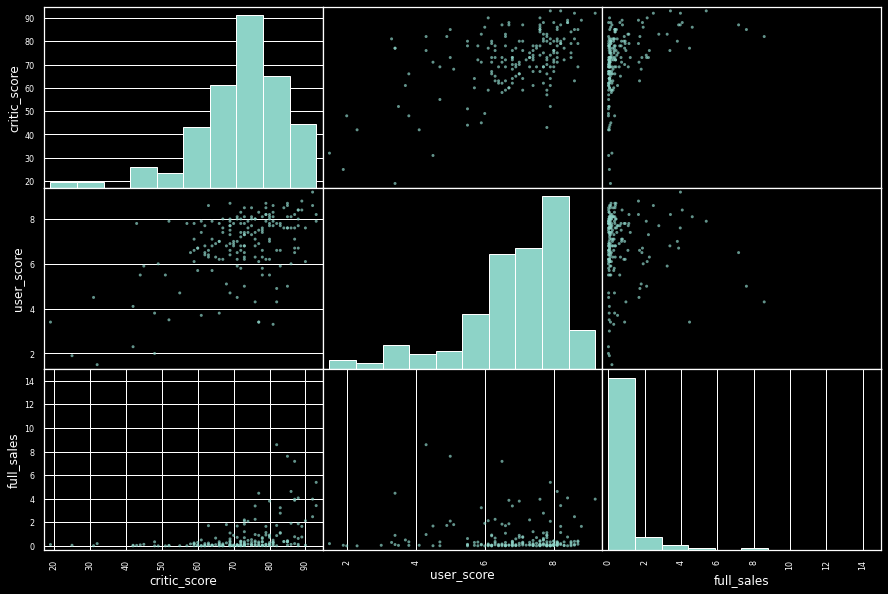

In [61]:
df_ps4 = df_2015.query('platform == "ps4"')[['critic_score', 'user_score', 'full_sales']]
pd.plotting.scatter_matrix(df_ps4, alpha=0.7);

<AxesSubplot:>

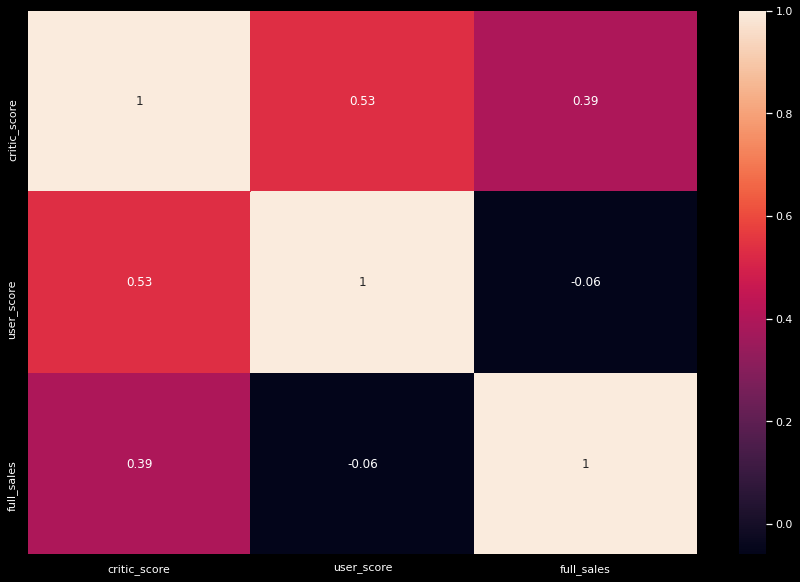

In [62]:
sns.heatmap(df_ps4.corr(),annot=True)

In [63]:
df_ps4.query('critic_score < 60').head(10)

,critic_score,user_score,full_sales
228,48.0,3.8,0.35
283,59.0,7.1,0.26
322,32.0,1.5,0.20
348,59.0,7.8,0.18
354,59.0,6.1,0.17
363,58.0,6.5,0.17
398,45.0,5.9,0.14
448,19.0,3.4,0.12
498,44.0,5.5,0.09
617,42.0,4.1,0.06


In [64]:
df_xone = df_2015[df_2015['platform'] == 'xone'][['critic_score', 'user_score', 'full_sales']]

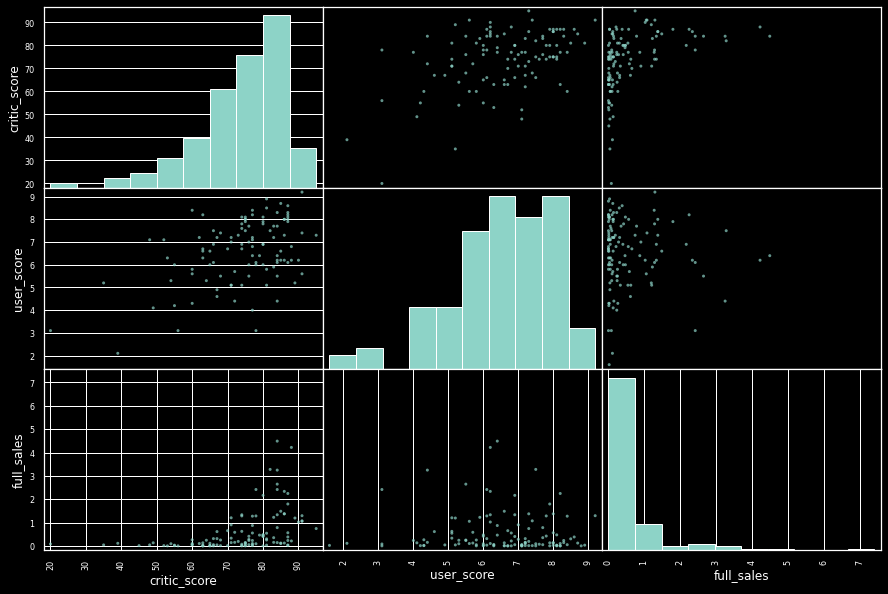

In [65]:
pd.plotting.scatter_matrix(df_xone, alpha=0.7);

<AxesSubplot:>

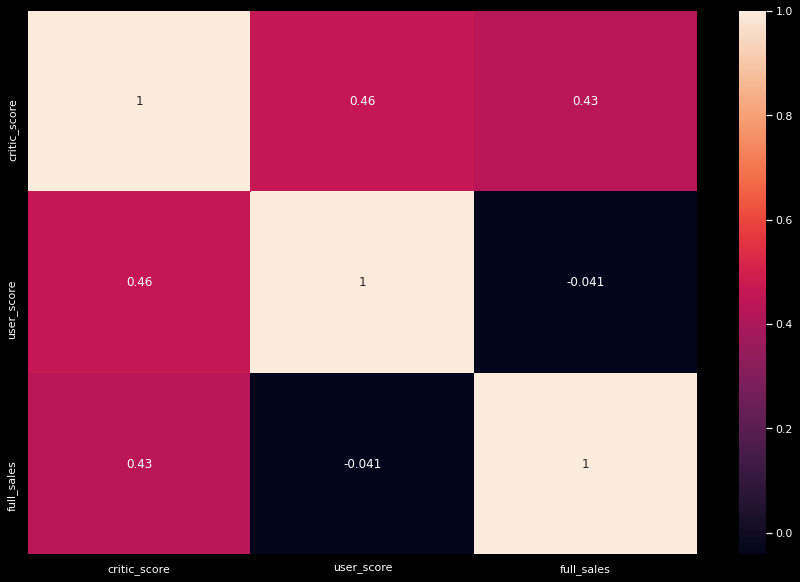

In [66]:
sns.heatmap(df_xone.corr(),annot=True)

- Для XOne ситуация похожая он так же по нашей оценке будет популярен в 2017.

In [67]:
df_psv = df_2015[df_2015['platform'] == 'psv'][['critic_score', 'user_score', 'full_sales']]
df_psv

,critic_score,user_score,full_sales
198,NaN,8.1,0.41
223,70.0,7.1,0.36
248,76.0,8.6,0.32
257,NaN,NaN,0.30
301,NaN,NaN,0.23
...,...,...,...
1093,NaN,NaN,0.01
1095,NaN,NaN,0.01
1096,NaN,NaN,0.01
1098,NaN,NaN,0.01


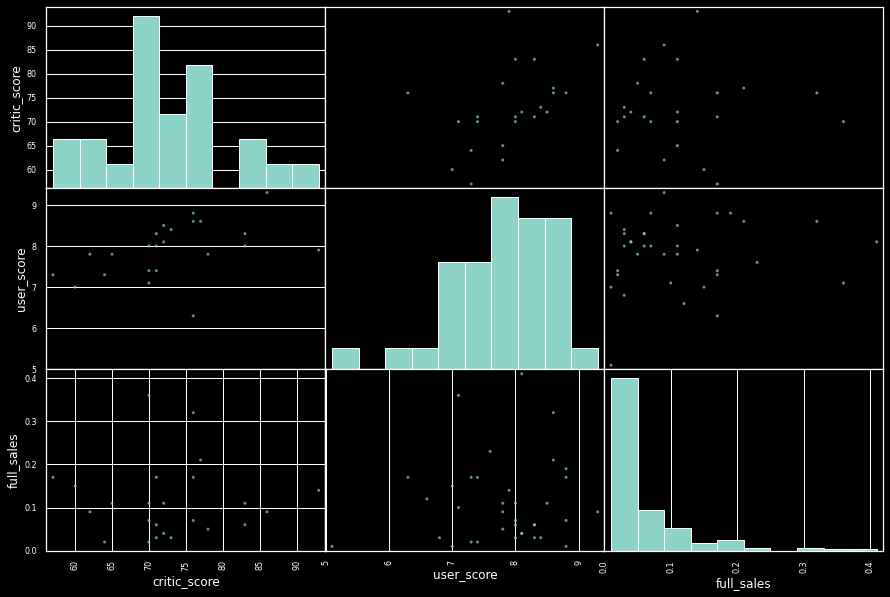

In [68]:
pd.plotting.scatter_matrix(df_psv, alpha=0.7);

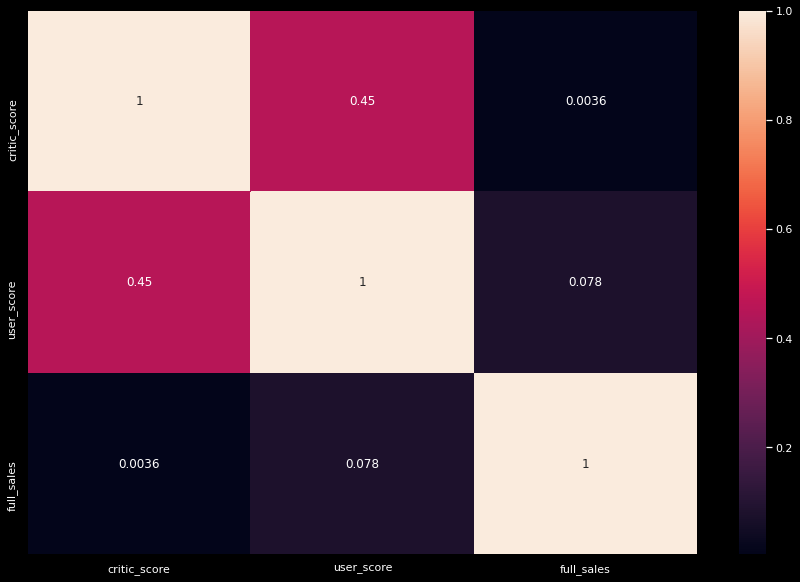

In [69]:
sns.heatmap(df_psv.corr(),annot=True);

In [70]:
df_wii = df_2015[df_2015['platform'] == 'wiiu'][['critic_score', 'user_score', 'full_sales']]

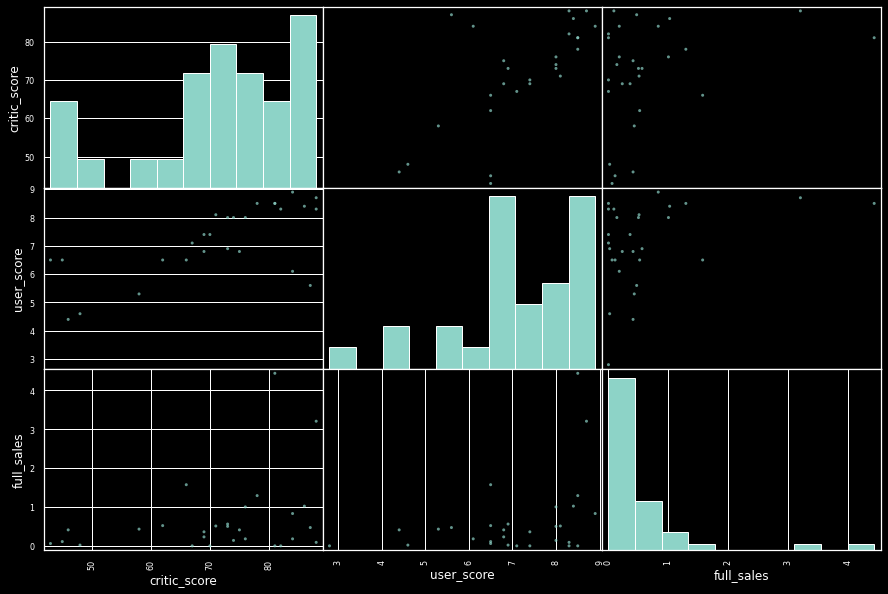

In [71]:
pd.plotting.scatter_matrix(df_wii, alpha=0.7);

<AxesSubplot:>

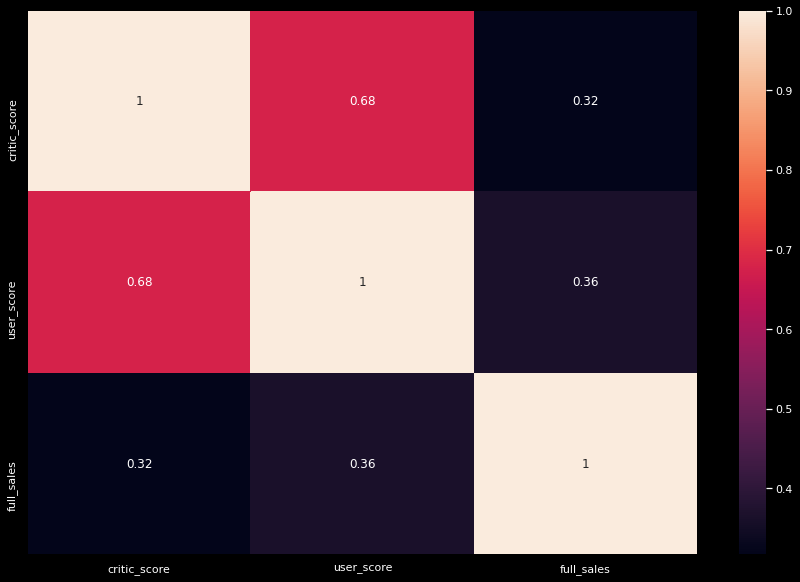

In [72]:
sns.heatmap(df_wii.corr(),annot=True)

In [73]:
df_pc = df_2015[df_2015['platform'] == 'pc'][['critic_score', 'user_score', 'full_sales']]

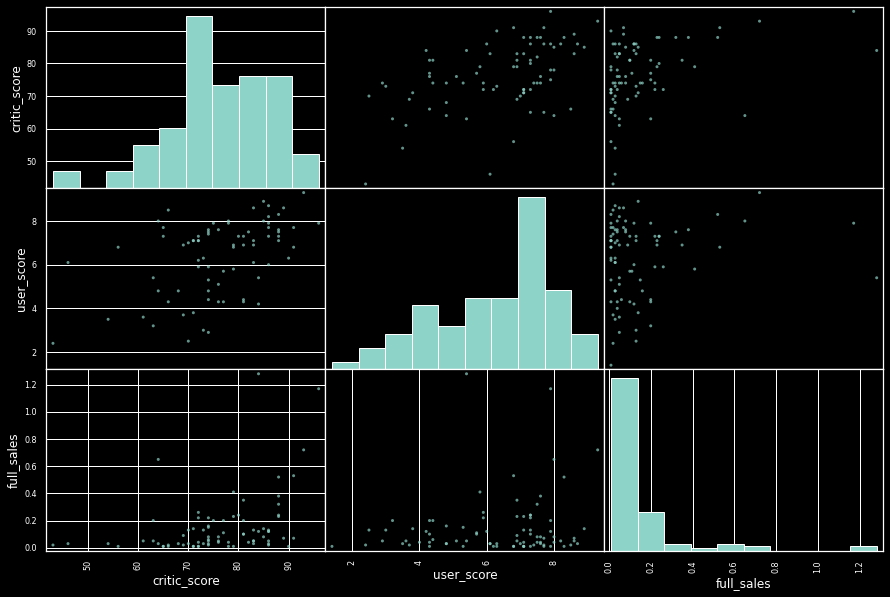

In [74]:
pd.plotting.scatter_matrix(df_pc, alpha=0.7);

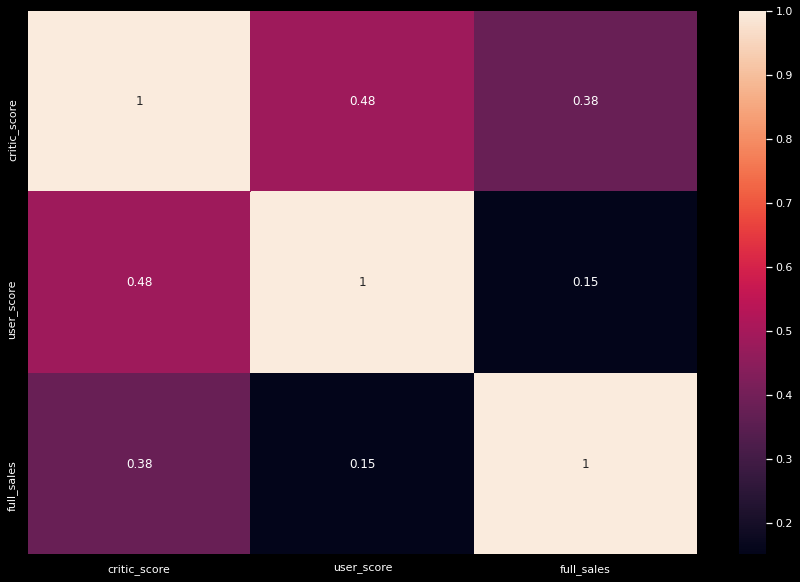

In [75]:
sns.heatmap(df_pc.corr(),annot=True);

- Отмечу что хорошая оценка повышает,но не гарантирует успеха игры, но плохая оценка в свою очередь его исключает! То есть если вашу игру оценили хорошо это не означает что она будет популярна или не окажется провальной, но если вашу игру оценили плохо то с огромной вероятностью ваш проект успеха не добьется


- Так же отмечу что оценка частных критиков и рейтинговых изданий оказывает большее влияние на судьбу игры чем оценка пользователей.


In [76]:
# check
df_psv.corr()['full_sales'].round(2).to_frame()

,full_sales
critic_score,0.00
user_score,0.08
full_sales,1.00


In [77]:
genre_users_popular = (
    df_2015
    .pivot_table(index='genre', values='full_sales', aggfunc='sum')
    .sort_values(by='full_sales',ascending=False)
)


In [78]:
genre_dev_popular = df_2015['genre'].value_counts().to_frame()

In [79]:
genre_popular = genre_users_popular.join(genre_dev_popular)

In [80]:
genre_popular.columns = ['total_sales','total_dev']

In [81]:
genre_popular.reset_index(inplace=True)

In [82]:
genre_popular['popular_ratio'] = genre_popular['total_sales'] / genre_popular['total_dev']
genre_popular

,genre,total_sales,total_dev,popular_ratio
0,Shooter,105.73,81,1.305309
1,Action,101.82,425,0.239576
2,Sports,64.33,107,0.601215
3,Role-Playing,55.82,132,0.422879
4,Misc,13.04,69,0.188986
5,Fighting,12.37,37,0.334324
6,Adventure,11.98,110,0.108909
7,Racing,10.86,42,0.258571
8,Platform,9.28,28,0.331429
9,Simulation,7.55,33,0.228788


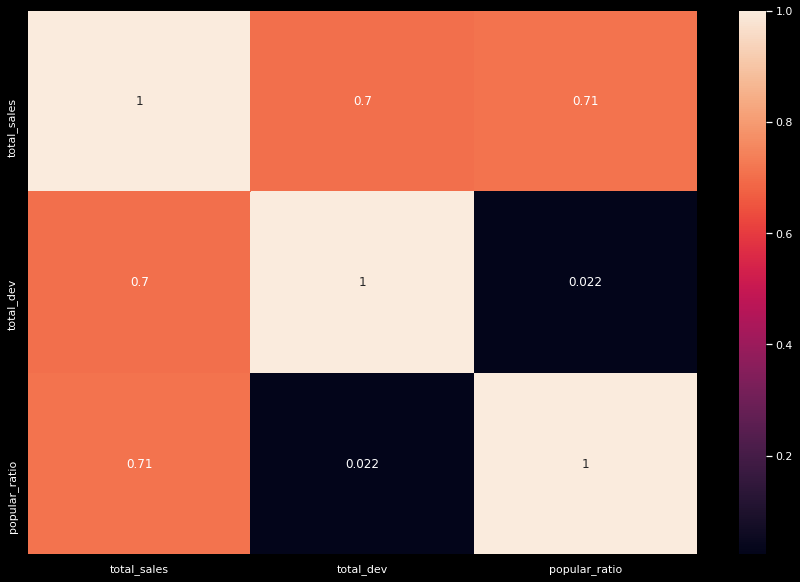

In [83]:
sns.heatmap(genre_popular.corr(), annot=True);

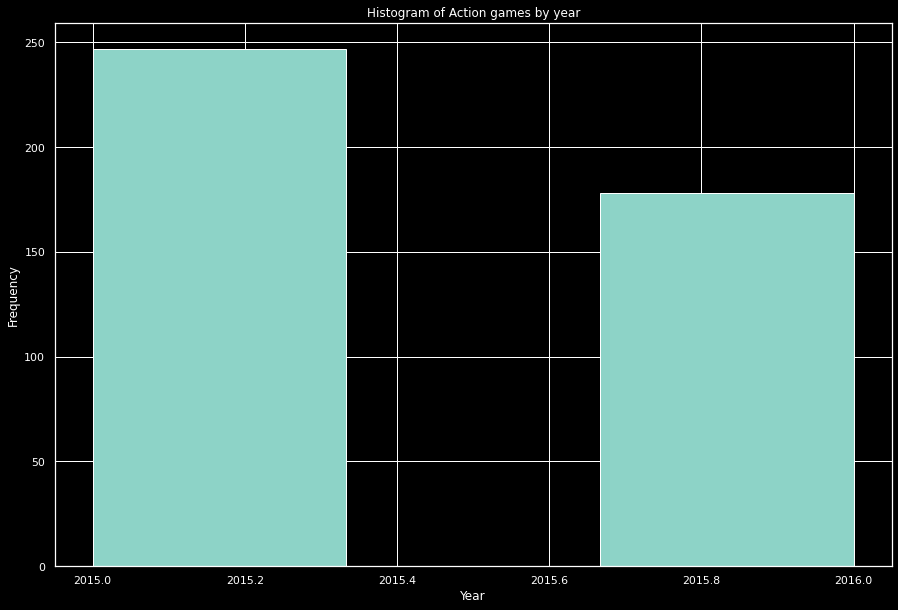

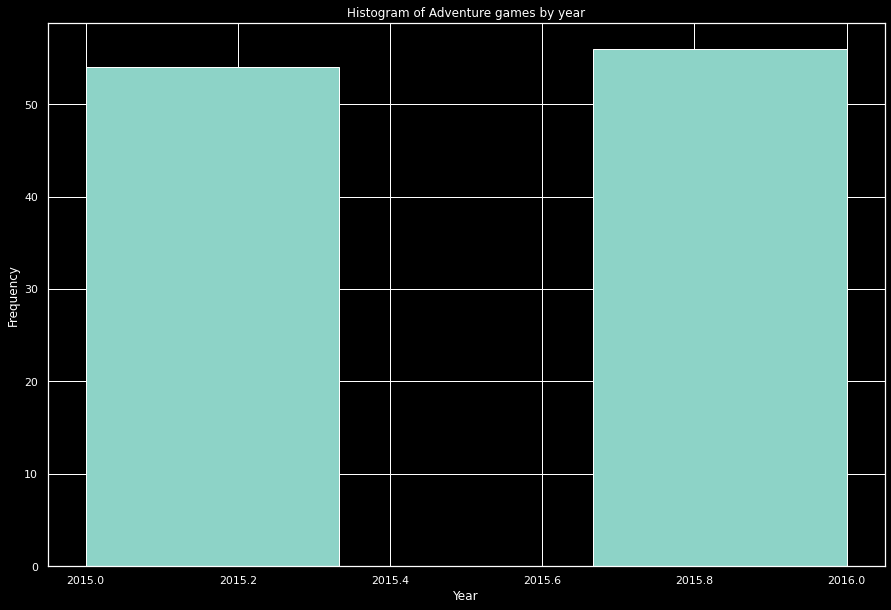

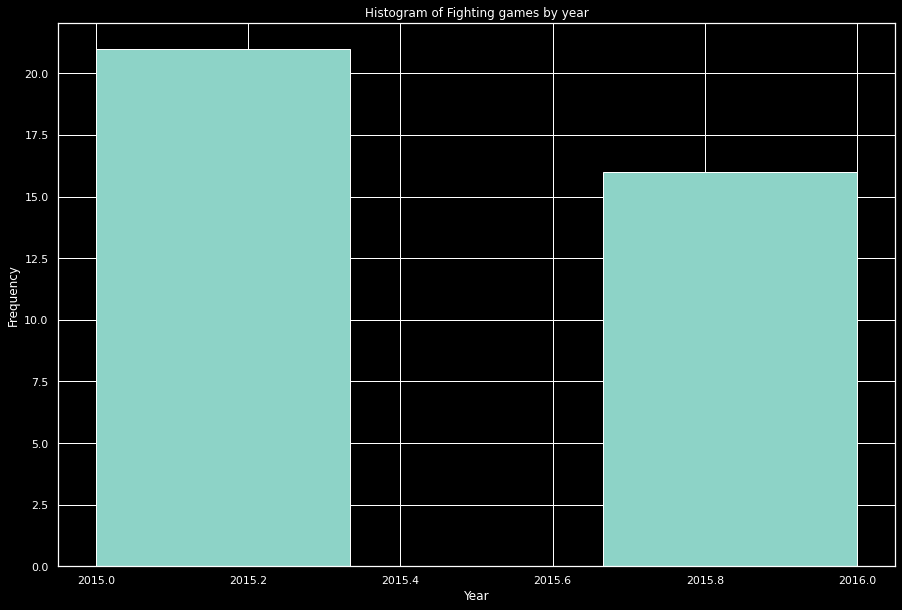

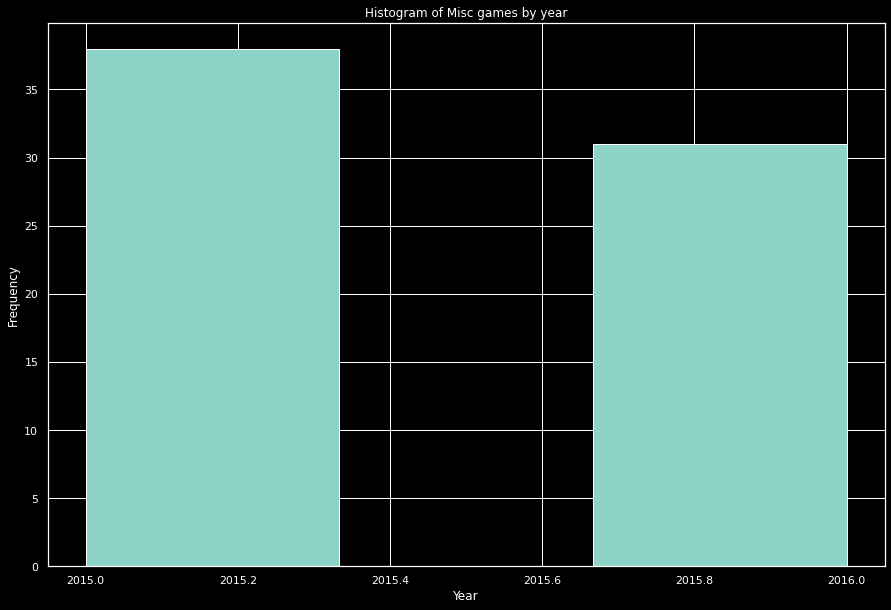

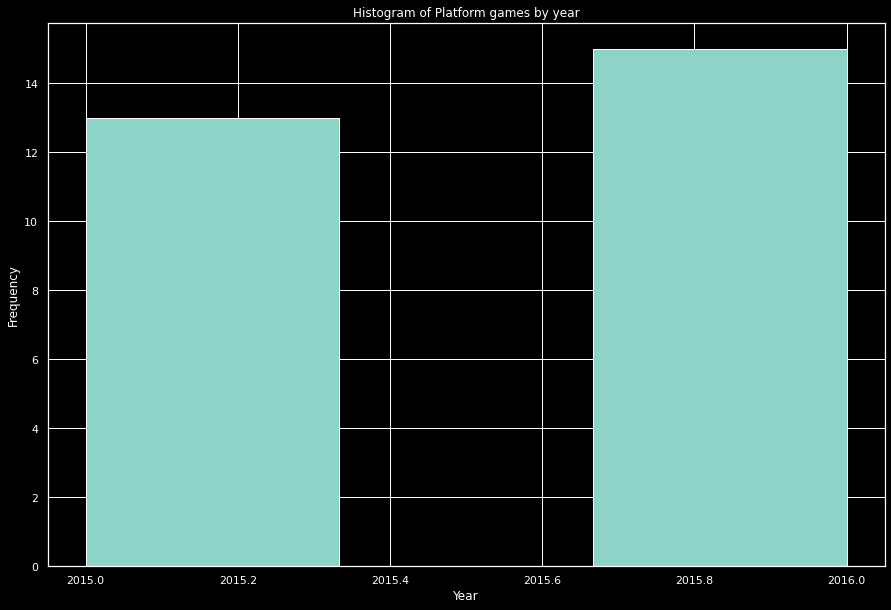

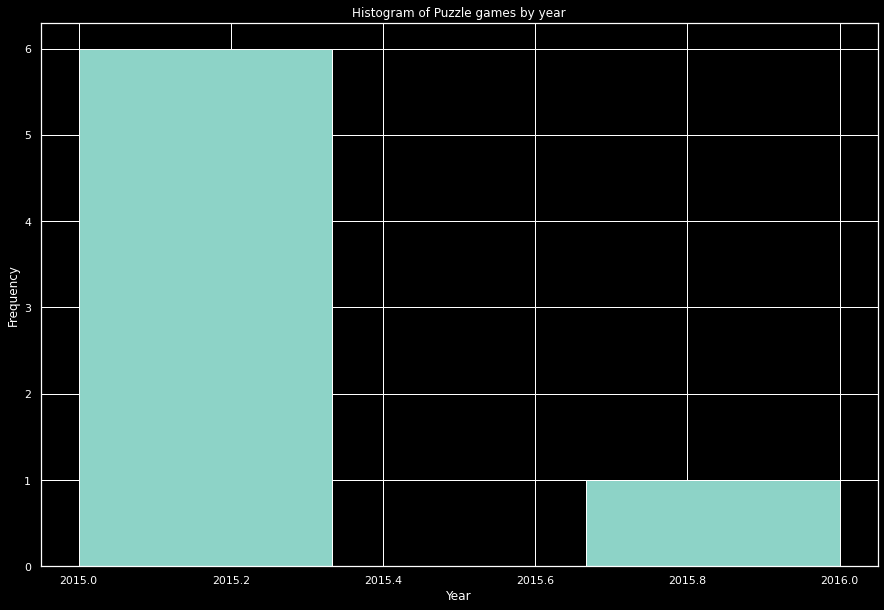

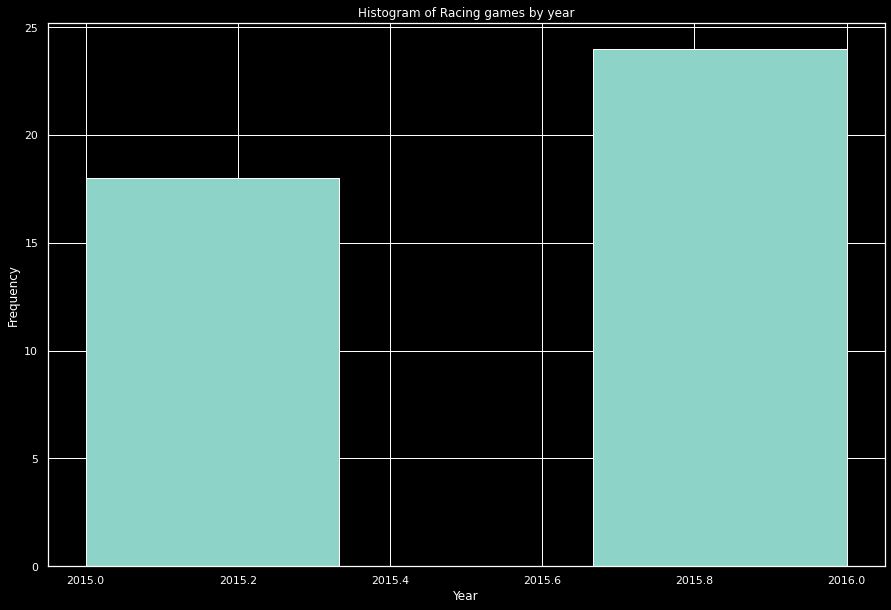

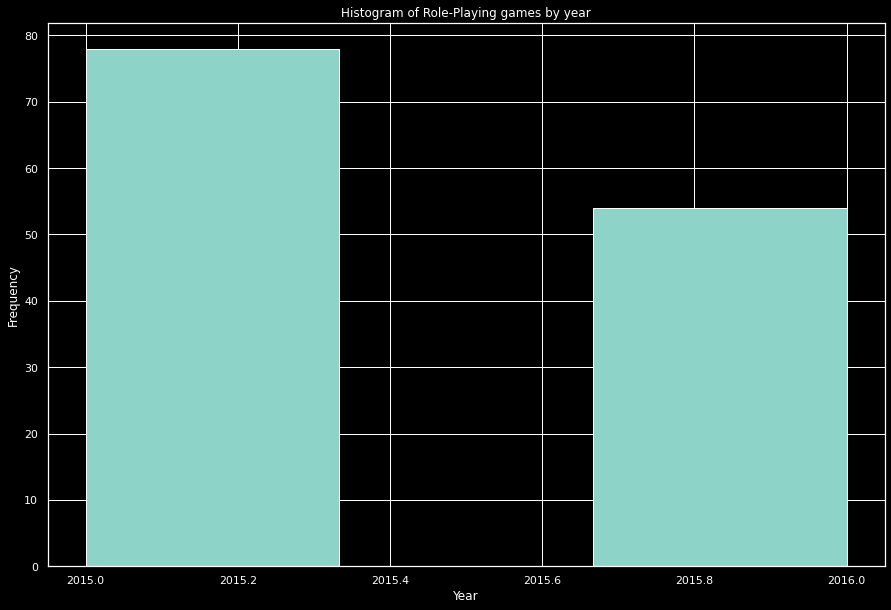

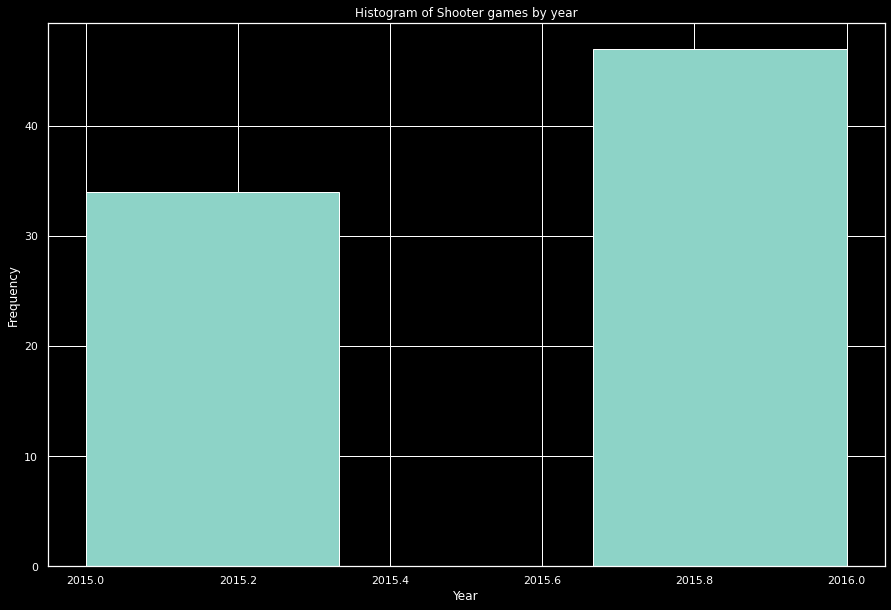

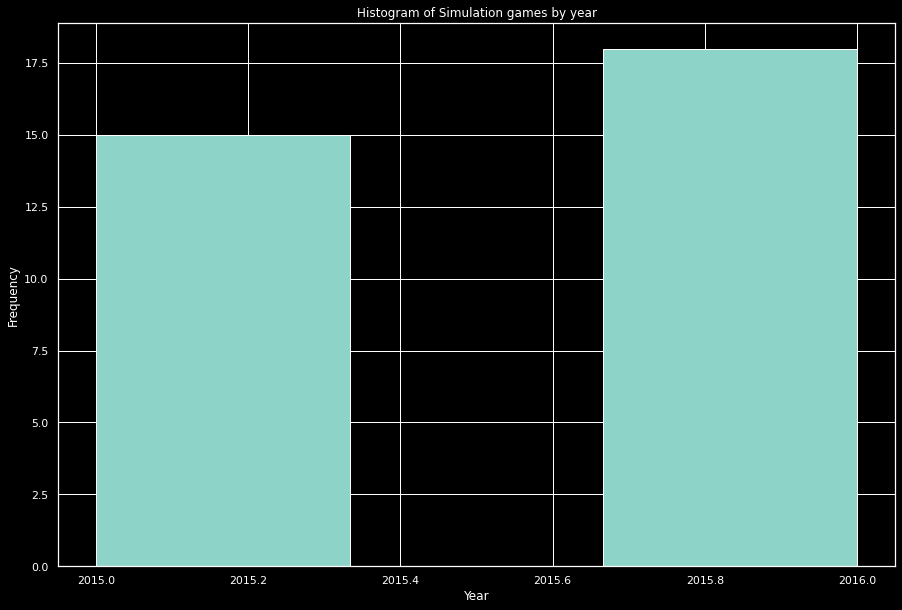

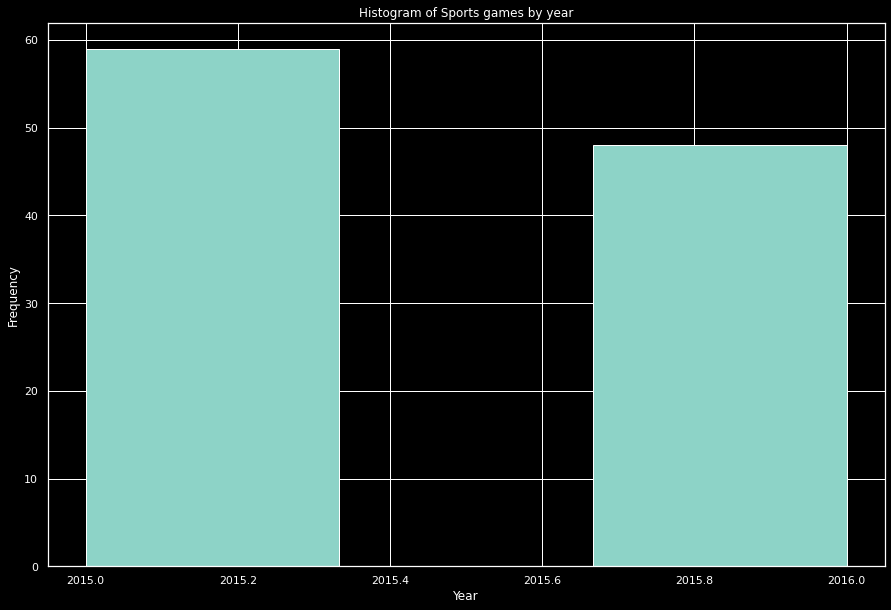

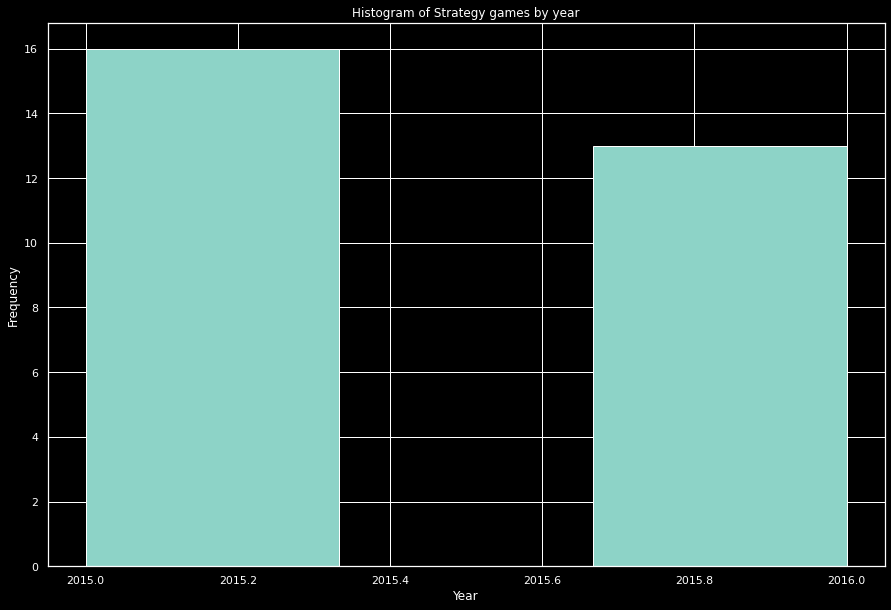

In [84]:
df_genre_year = df_2015[['genre', 'year_of_release']]
for genre, data in df_genre_year.groupby('genre'):
    plt.hist(data['year_of_release'], bins=3)
    plt.title(f'Histogram of {genre} games by year')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()


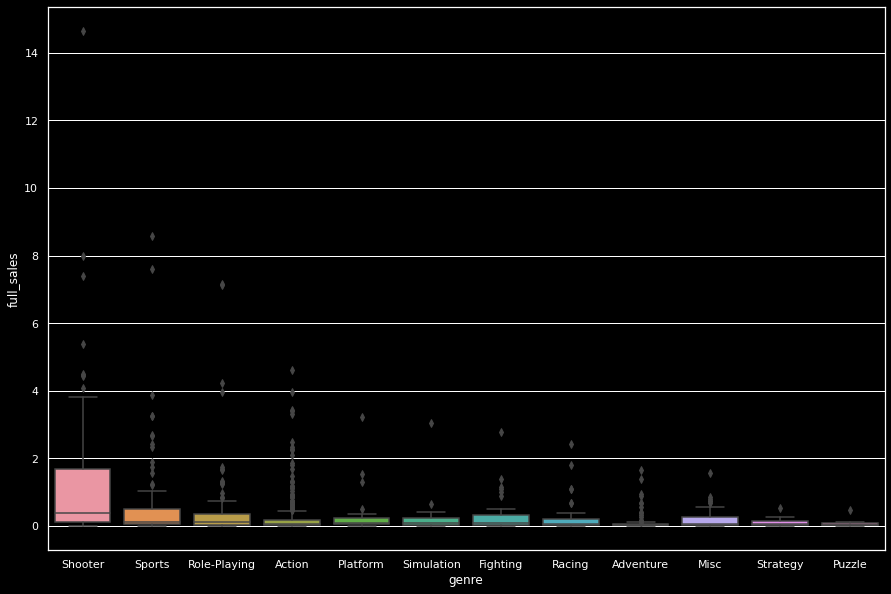

In [85]:
df_genre_sales = df_2015[['genre','full_sales']]
sns.boxplot(x='genre', y='full_sales', data=df_genre_sales, notch=False);

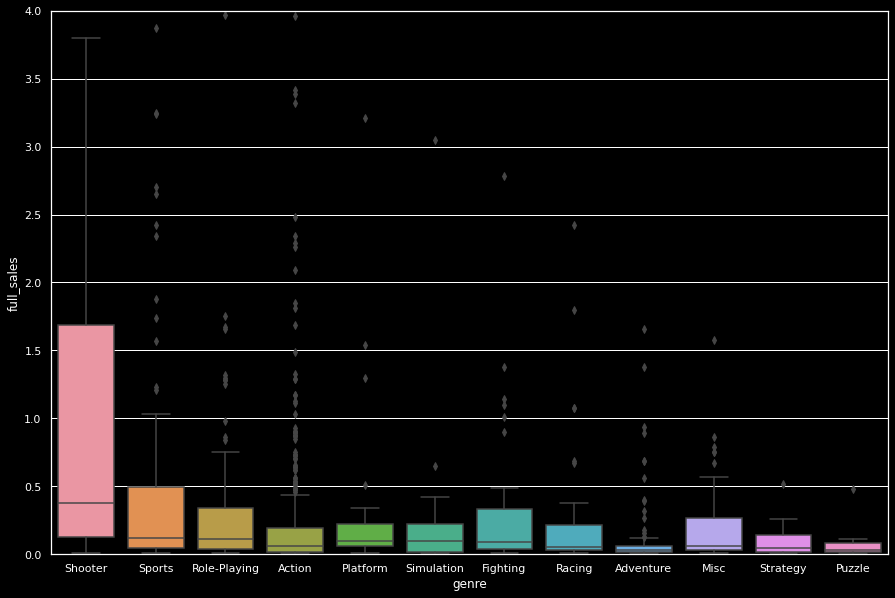

In [86]:
sns.boxplot(x='genre', y='full_sales', data=df_genre_sales, notch=False);
plt.ylim([0,4]);

In [87]:
df_2015.query('genre == "Shooter"')['name'].value_counts().count()

37

- Наименее пострадавшими от игрового бума являются жанры Action, Shooter и Role-Playing у пользователей остался интерес к этим жанрам несмотря на то что сама сфера довольно сильно просела


- Самым популярным жанром как у разработчиков так и у пользователей является Shooter, он так же при этом имеет самый большой коэффицент игроков на игру в этом случае даже можно сказать что спрос превышает предложение. так как почти на практически 106 миллионов игроков за 2 года было выпущено всего 37 игр это самое большое соотношение в индустрии.


- Корреляция значений сгруппированных по жанрам кол-во разработанных игр и кол-во игроков = 0.85 это очень высокое значение и оно говорит о том что есть сильная прямая связь! Чем популярнее жанр тем большая конкуренция за пользователей.


- Самая маленькая конкуренция находится в жанре Shooter он в ту же очередь является вторым по популярности жанром и жанром одним из наименее пострадавших от кризиса индустрии! считаю что это самый привлекательный жанр для разработчиков на ближайшие годы.


- Графики Boxplot демонстрируют нам как все игры определенного жанра рассредоточены по кол-ву продаж, что указывает нам лишний раз привлекательность жанра Shooter.

## Составим портрет пользователя каждого региона

**ESRB (Entertainment Software Rating Board)**

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
ESRB 2013 Early Childhood.svg

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"):
ESRB 2013 Everyone.svg

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.
ESRB 2013 Everyone 10+.svg

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
ESRB 2013 Teen.svg

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
ESRB 2013 Mature.svg

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.
ESRB 2013 Adults Only.svg

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:

ESRB 2013 Rating Pending.svg
«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант

**NA Region**

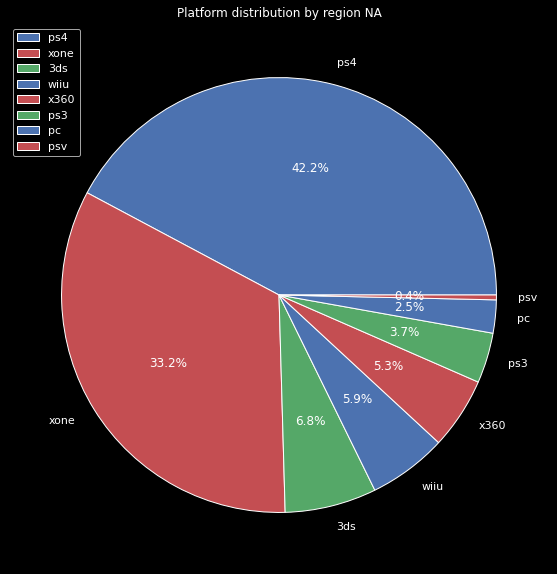

In [88]:
na_platform = (
    df_2015
    .groupby('platform')['na_sales']
    .sum()
    .sort_values(ascending=False)
    .to_frame()
)
my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(df)))
na_platform.plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%',colors = my_colors)
plt.title("Platform distribution by region NA")
plt.ylabel("")
plt.show()

- Большую долю рынка занимает ps4 и xone

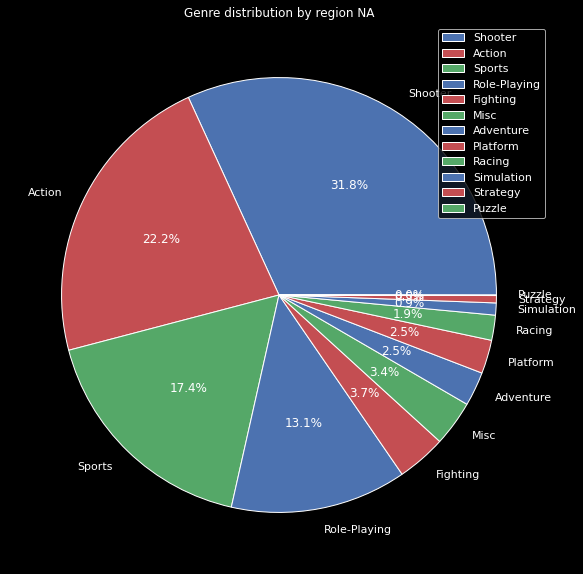

In [89]:
na_genre = (
    df_2015
    .groupby('genre')['na_sales']
    .sum()
    .sort_values(ascending=False)
    .to_frame()
)
my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(df)))
na_genre.plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%',colors = my_colors)
plt.title("Genre distribution by region NA")
plt.ylabel("")
plt.show()

**Можно выделить 4 доминирующих жанра**

- Shooter - 31.8%


- Action - 22.2%


- Sports - 17.4%


- Role-Playing - 13.1%

In [90]:
(
    df_2015
    .groupby('rating')['na_sales']
    .sum()
    .sort_values(ascending=False)
    .to_frame()
)

,na_sales
rating,
M,47.03
unknown_category,37.42
E,26.59
T,22.86
E10+,17.40


- Для NA заметно выделяется жанр "M" (17+)

**EU Region**

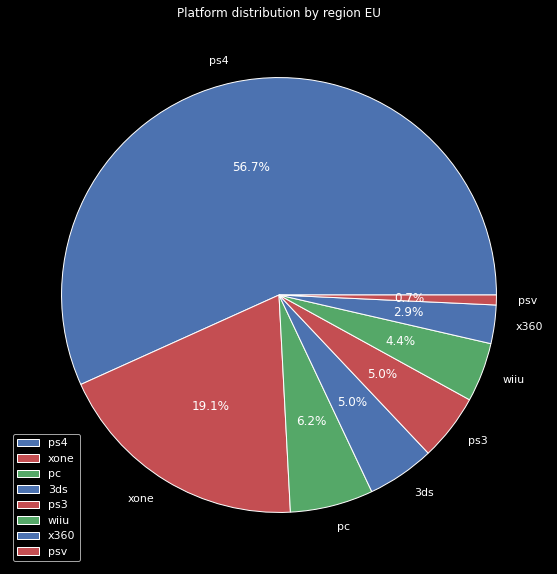

In [91]:
eu_platform = (
    df_2015
    .groupby('platform')['eu_sales']
    .sum()
    .sort_values(ascending=False)
    .to_frame()
)
my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(df)))
eu_platform.plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%',colors = my_colors)
plt.title("Platform distribution by region EU")
plt.ylabel("")
plt.show()

- Сильная доля рынка за PS4 ближайший конкурент XOne

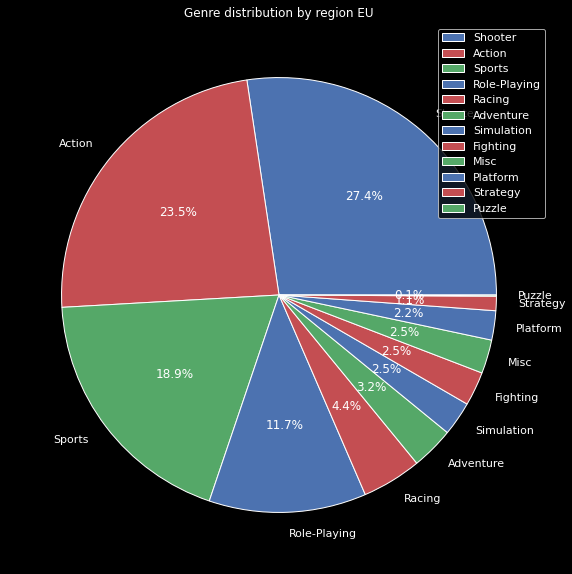

In [92]:
eu_genre = (
    df_2015
    .groupby('genre')['eu_sales']
    .sum()
    .sort_values(ascending=False)
    .to_frame()
)
my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(df)))
eu_genre.plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%',colors = my_colors)
plt.title("Genre distribution by region EU")
plt.ylabel("")
plt.show()

**Можно выделить 4 доминирующих жанра**

- Shooter - 27.4%


- Action - 23.5%


- Sports - 18.9%


- Role-Playing - 11.7%

In [93]:
(
    df_2015
    .groupby('rating')['eu_sales']
    .sum()
    .sort_values(ascending=False)
    .to_frame()
    
)

,eu_sales
rating,
M,45.54
unknown_category,35.59
E,34.79
T,20.32
E10+,10.97


**JP Region**

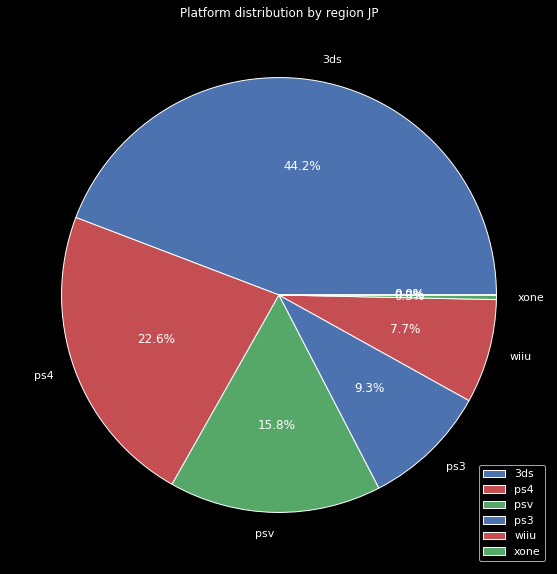

In [94]:
jp_platform = (
    df_2015
    .groupby('platform')['jp_sales']
    .sum()
    .sort_values(ascending=False)
    .to_frame()
)
my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(df)))
jp_platform.plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%',colors = my_colors)
plt.title("Platform distribution by region JP")
plt.ylabel("")
plt.show()

- Сильная доминация за консолью 3DS далее расположены PS4 и PSV доминацию приставки от нинтендо очень легко объяснить тем что данная компания является Японской

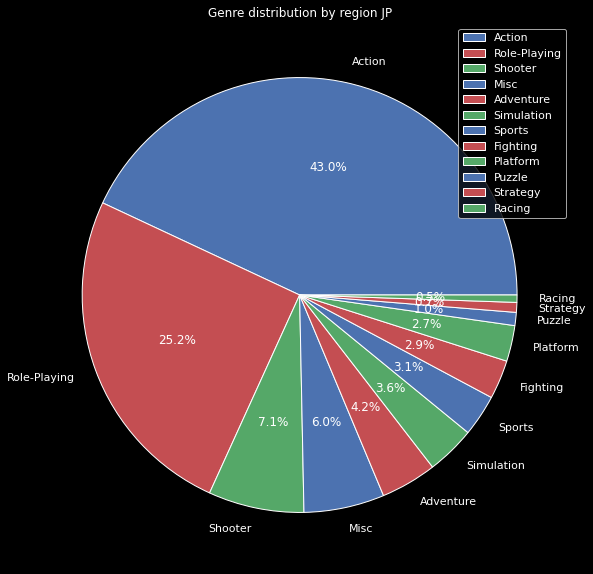

In [95]:
jp_genre = (
    df_2015
    .groupby('genre')['jp_sales']
    .sum()
    .sort_values(ascending=False)
    .to_frame()
)
my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(df)))
jp_genre.plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%',colors = my_colors)
plt.title("Genre distribution by region JP")
plt.ylabel("")
plt.show()

- На рынке жанров уже совсем другая ситуация огромная доля принадлежит action - 43%, далее распологается role-playing - 25,2%

In [96]:
(
    df_2015
    .groupby('rating')['jp_sales']
    .sum()
    .sort_values(ascending=False)
    .to_frame()
)

,jp_sales
rating,
unknown_category,32.77
T,7.70
E,5.25
M,4.29
E10+,3.27


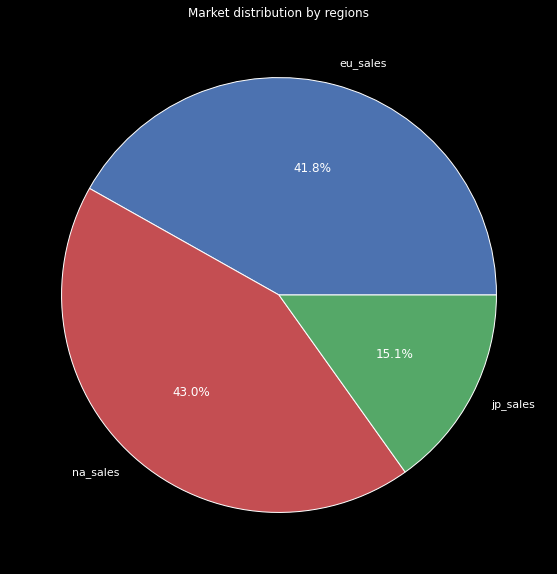

In [97]:
region_market = (
    df_2015[['eu_sales','na_sales','jp_sales']]
    .sum()    
)
my_colors = list(islice(cycle(['b', 'r', 'g']), None, len(df)))
region_market.plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%',colors = my_colors)
plt.title("Market distribution by regions")
plt.ylabel("")
plt.show()

In [98]:
eu_genre['eu_sales']

genre
Shooter         40.28
Action          34.66
Sports          27.82
Role-Playing    17.21
Racing           6.52
Adventure        4.67
Simulation       3.74
Fighting         3.72
Misc             3.69
Platform         3.20
Strategy         1.57
Puzzle           0.13
Name: eu_sales, dtype: float64

- На данной диаграмме можно увидеть что NA и EU поровну делят большую часть рынка, а JP при этом занимает всего 15%

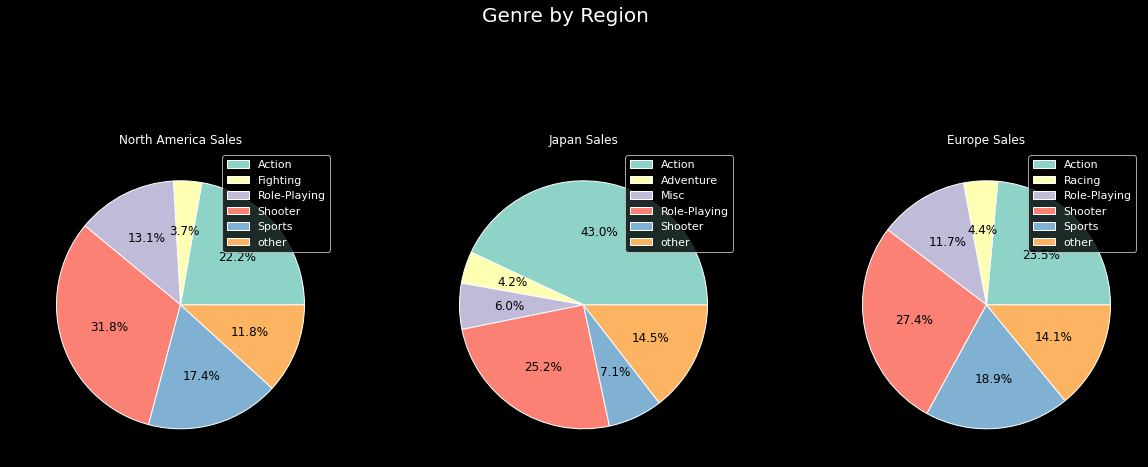

In [99]:
na_genre.reset_index(inplace=True)
jp_genre.reset_index(inplace=True)
eu_genre.reset_index(inplace=True)

na_genre_top = na_genre.head()
na_genre['genre'] = na_genre['genre'].replace(list(set(na_genre['genre']) - set(na_genre_top['genre'])), 'other')
jp_genre_top = jp_genre.head()
jp_genre['genre'] = jp_genre['genre'].replace(list(set(jp_genre['genre']) - set(jp_genre_top['genre'])), 'other')
eu_genre_top = eu_genre.head()
eu_genre['genre'] = eu_genre['genre'].replace(list(set(eu_genre['genre']) - set(eu_genre_top['genre'])), 'other')

eu_genre = eu_genre.groupby('genre').sum()
na_genre = na_genre.groupby('genre').sum()
jp_genre = jp_genre.groupby('genre').sum()

fig = plt.figure()
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

na_genre.plot(kind='pie', y='na_sales',ylabel='', ax=ax1, autopct='%1.1f%%',textprops={'color': 'black'})
ax1.set_title('North America Sales')

jp_genre.plot(kind='pie', y='jp_sales',ylabel='', ax=ax2, autopct='%1.1f%%',textprops={'color': 'black'})
ax2.set_title('Japan Sales')

eu_genre.plot(kind='pie', y='eu_sales',ylabel='', ax=ax3, autopct='%1.1f%%',textprops={'color': 'black'})
ax3.set_title('Europe Sales')

fig.suptitle('Genre by Region', fontsize=20)
fig.set_size_inches(20, 8)
fig.subplots_adjust(top=0.8, wspace=0.3)

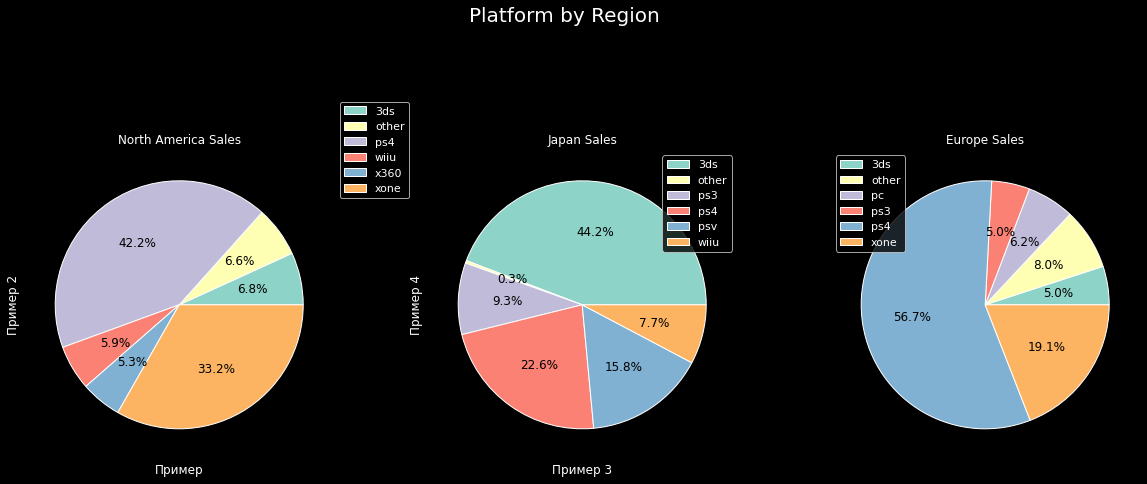

In [100]:
na_platform.reset_index(inplace=True)
jp_platform.reset_index(inplace=True)
eu_platform.reset_index(inplace=True)

na_platform_top = na_platform.head()
na_platform['platform'] = na_platform['platform'].replace(list(set(na_platform['platform']) - set(na_platform_top['platform'])), 'other')
jp_platform_top = jp_platform.head()
jp_platform['platform'] = jp_platform['platform'].replace(list(set(jp_platform['platform']) - set(jp_platform_top['platform'])), 'other')
eu_platform_top = eu_platform.head()
eu_platform['platform'] = eu_platform['platform'].replace(list(set(eu_platform['platform']) - set(eu_platform_top['platform'])), 'other')

eu_platform = eu_platform.groupby('platform').sum()
na_platform = na_platform.groupby('platform').sum()
jp_platform = jp_platform.groupby('platform').sum()

fig = plt.figure()
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

na_platform.plot(kind='pie', y='na_sales',ylabel='', ax=ax1, autopct='%1.1f%%',textprops={'color': 'black'})
ax1.set_title('North America Sales')
ax1.set_xlabel('Пример')
ax1.set_ylabel('Пример 2')

jp_platform.plot(kind='pie', y='jp_sales',ylabel='', ax=ax2, autopct='%1.1f%%',textprops={'color': 'black'})
ax2.set_title('Japan Sales')
ax2.set_xlabel('Пример 3')
ax2.set_ylabel('Пример 4')

eu_platform.plot(kind='pie', y='eu_sales',ylabel='', ax=ax3, autopct='%1.1f%%',textprops={'color': 'black'})
ax3.set_title('Europe Sales')


# уберем легенду в правый верх. угол
ax1.legend(loc='center left', bbox_to_anchor=(1, 1))

fig.suptitle('Platform by Region', fontsize=20)
fig.set_size_inches(20, 8)
fig.subplots_adjust(top=0.8, wspace=0.3)

## Проверка гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**


- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.


- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [102]:
xone_user_rating = df_2015.query('platform == "xone"')['user_score'].dropna()
pc_user_rating = df_2015.query('platform == "pc"')['user_score'].dropna()
alpha = 0.05
results = st.ttest_ind(xone_user_rating, pc_user_rating)
print('P-value =',results.pvalue)
if alpha > results.pvalue:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не отвергаем нулевую гипотезу')

P-value = 0.2778542084733835
Не отвергаем нулевую гипотезу


In [103]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


**Средние пользовательские рейтинги жанров Action и Sports разные**


- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.



- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [104]:
action_user_rating = df_2015.query('genre == "Action"')['user_score'].dropna()
sports_user_rating = df_2015.query('genre == "Sports"')['user_score'].dropna()
alpha = 0.05
results = st.ttest_ind(action_user_rating, sports_user_rating)

print('P-value =',results.pvalue)
if alpha > results.pvalue:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не отвергаем нулевую гипотезу')

P-value = 1.0012846807938657e-13
Отвергаем нулевую гипотизу


## Вывод

### Предобработка данных


#### Регистр названия столбцов приведен к нижнему.
#### Удалены строки с отсутствующими значениями в столбце genre и name, а так же в столбце year_of_release.
#### В столбцах user_score и year_of_release изменен тип данных на float и int соответственно.
#### Создан столбец full_sales в которых входит сумма продаж игры по всем регионам
#### После удаления строк с пропущенными значениями в столбцах year_of_release и genre (пропуски в столбцах genre и name совпали) осталось 98,4% от всего дата сета.


### Исследовательский анализ данных (EDA)


#### Игровая индустрия испытывала огромный рост вплоть до 2008 года после чего начала постепенное снижение и после 2014 года стабилизировалась в районе 550-600 миллионов копий ежегодно.
#### Для дальнейшего анализа за среднюю актуальность одной версии приставки было принято взять показатель в 2 года
#### Удалось выявить на рынке трех основных конкурентов в лице Nintendo, Sony и Microsoft
#### На основании этих показателей были приняты наиболее популярные платформы на ближайшайшие годы: 3DS, WiiU, PS4, Xbox One и PC
#### В результате оценки влияния рейтинга от критиков и пользователей было выявлено что оценки критиков имеют большую точность, но все не однозначно то есть в выборке имеются случаи когда игры с хорошим рейтингом не пользуются популярностью, но случаев когда игры с плохим рейтингом пользуются популярностью обнаружено не было, от сюда вывод что плохие оценки влияют на продукт gamedev корпораций сильнее чем хорошие. 
#### Еще одним исключением оказалась PSV  на этой платформе отзывы пользователей чуть ли не на прямую влияют на продажи
#### Наиболее популярными жанрами являются Action, Shooter, Sports, Misc, Role-Playing
#### Жанр Shooter имеет очень большое кол-во игроков (106 миллионов) на (31) игру что является самым огромным соотношением в сфере
#### Рынок игроков распределен в большей части между NA и EU равномерно. На JP приходиться всего около 15% всего рынка
#### На JP рынок стоит сильно ориентироваться если наш продукт 


- Для платформ 3DS/WiiU

- Жанр role-playing или action



#### PS4 доминирует на рынке классических консолей - единственным конкурентом является XBOX One


#### Так же наименее постарадавшими от кризиса игровой индустрии являются такие жанры как Action, Role-playing, Shoteer.


#### PC мы рассматриваем немного в разрез остальному рынку т.к. нельзя сказать того что данная платформа является конкурентом для рассмотренных выше приставок.


### Проверка гипотез


#### В результате проверки гипотез 
- Мы не отвергли нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Мы не отвергли альтернативную гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные


### Итог


#### Жанры:


- Если мы ориентируемся на NA,EU рынки наибольшая потенциал кроется в жанре Shooter по многим факторам, но жанры Action, Role-playing, Sports.


- для рынка JP - Role-Playing, Action.


#### Платформа:


- Xbox One и PS4 если мы ориентируемся на классические приставки, WiiU, 3DS и PSV если на портативные. PC так же является актуальной платформой.


#### Регионы: 


- Наиболее сильнымы игровыe рынки относятся к EU и NA.


#### Возраст пользователей:  


- В EU и NA Большая часть пользователей 17+, в Японии же приблизительно одинаково игроков всех возрастов то есть если мы собираемся выпускать Role-playing с небольшими возрастными ограничениями нам обязательно нужна хорошая локализация для JP региона.

## Бонус

In [106]:
data_games = pd.read_csv('/datasets/games.csv')

In [107]:
data_games.columns = map(str.lower, data_games.columns)

In [108]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [109]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [110]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [111]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [112]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

In [113]:
plt.style.use('default')

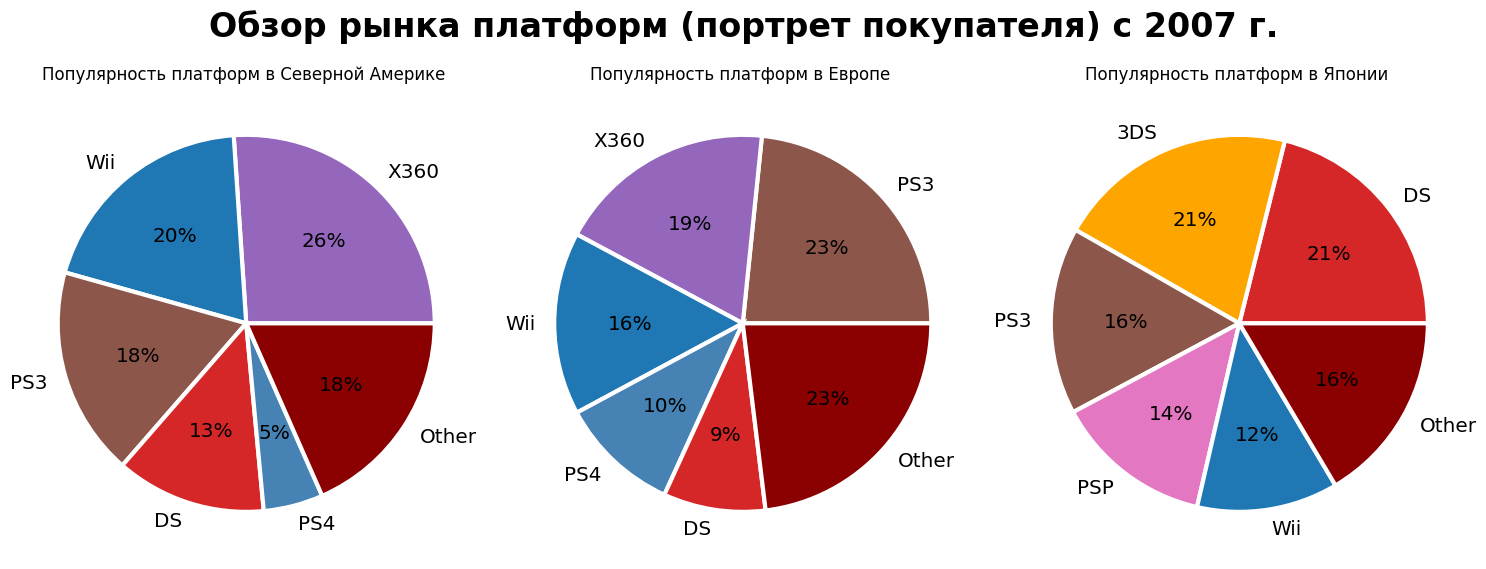

In [114]:
x_year = 2007

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

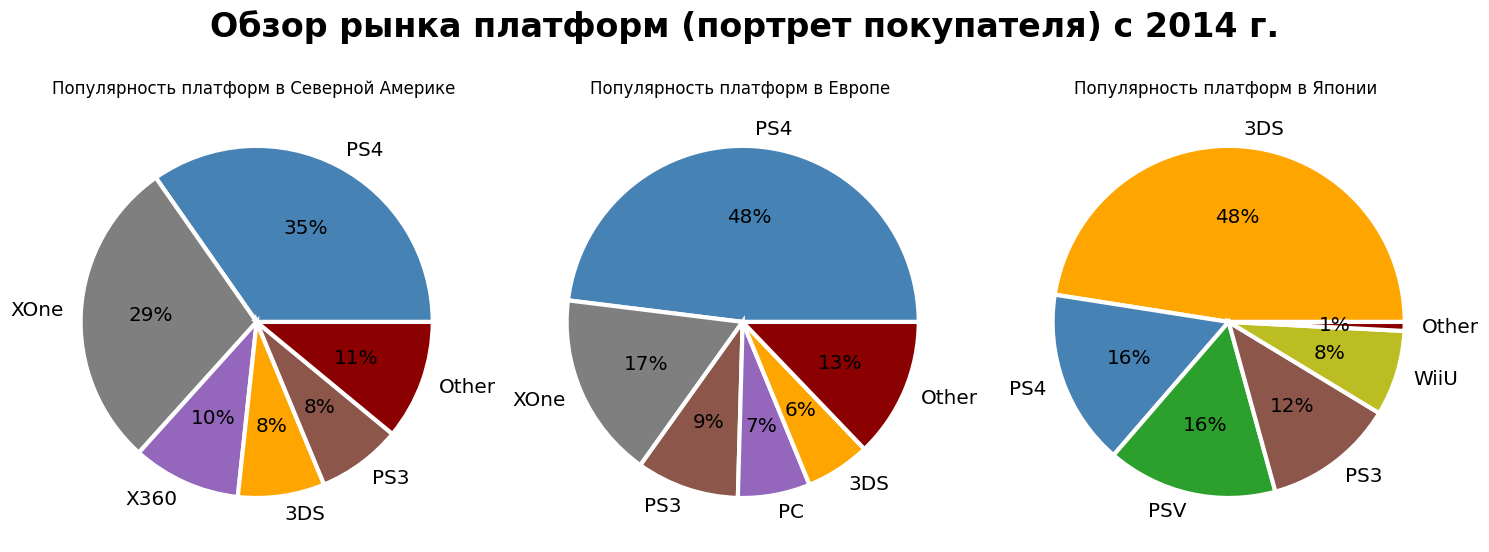

In [115]:
x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

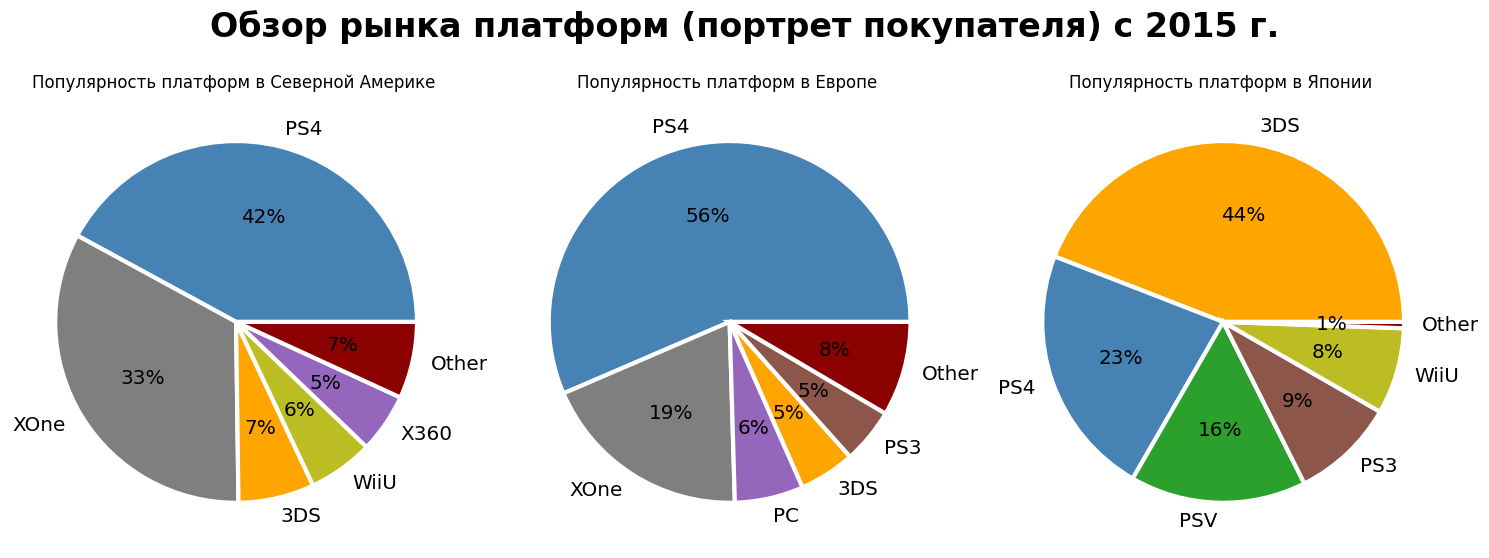

In [116]:
x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])